# [Cardiovascular Disease](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset) Part 1 – EDA

---

**Заказчик**

Для внутреннего (Яндекс.Практикум) соревнования [Heart diseases prediction](https://www.kaggle.com/competitions/yap15-heart-diseases-predictions).

---

**Входные данные**: параметры обследованных пациентов; данные изначально разделены на обучающий и тестовый наборы.

---

**Цель**

Predict risk of heart diseases from patient lifestyle information.  
Целевая метрика – ROC-AUC-score.

---

**Задачи:**  

* Установить характеристики пациентов наиболее часто страдающих ССЗ
* Установить характеристики пациентов входящих в группу риска ССЗ
* Подобрать оптимальную модель соответствующую качеству 

**Some explanations**

---

Permanent data tables named like: **data**.  

Temporary data tables named like: **df**.  

---

Intermediate conclusions are highlighted as follows:

> Intermediate conclusion.

---

The code of the cells are as independent as possible from each other in order to freely manipulate the cells.

## Intro

Features:

|                      Feature Full Name       |  Feature origin   | Feature Name |                    Data Type (units)       |
|:---------------------------------------------|:-------------------|:-----------|:--------------------------------------------|
|                      Age                      |  Objective Feature  |     age     |                    int (days)                    |
| Height                                        | Objective Feature   | height      | int (cm)                                         |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |
| Physical activity                             | Subjective Feature  | active      | binary                                           |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |

All of the dataset values were collected at the moment of medical examination. 

## Initial

**Import libraries | Импортировать библиотеки**

In [1]:
import pandas as pd
import numpy as np

import os
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

# !pip install pandas-profiling[notebook]

import pandas_profiling as pp
import joblib

C:\Users\Admin\AppData\Local\Temp\ipykernel_8216\3939723443.py:15: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


### Constants | Константа

In [2]:
# PATH_LOCAL = 'datasets/'                                              # local path to data
# PATH_REMOTE = '/kaggle/input/yap15-heart-diseases-predictions/'       # remote path to data

CR = '\n'                                                             # new line
RANDOM_STATE = RS = 88                                                # random_state

### Functions | Функции

In [3]:
# def custom_read_csv(file_name, separator=','):
#     """
#     чтение датасета в формате CSV:
#       сначала из локального хранилища;
#       при неудаче — из удаленного хранилища Kaggle.
#     """

#     path_local = f'{PATH_LOCAL}{file_name}'
#     path_remote = f'{PATH_REMOTE}{file_name}'
    
#     if os.path.exists(path_local):
#         return pd.read_csv(path_local, sep=separator)

#     elif os.path.exists(path_remote):
#         return pd.read_csv(path_remote, sep=separator)

#     else:
#         print(f'File "{file_name}" not found at the specified path ')

In [4]:
def df_name(df):
    """
    table name determination
    """
    return [name for name in globals() if globals()[name] is df][0]

In [5]:
def basic_info(df: pd.DataFrame, sample_type='sample', samples=5, describe='all'):
    """
    first info about dataframe: info(), sample()/head()/tail(), describe()
    """
    
    # title (name of dataframe)
    
    print(f'\n\ndataframe {f.BOLD}{df_name(df)}{f.END}', '≋'*30)


    # method info()
    
    print('\n\n--- method info() ---\n')
    print(df.info())

    
    # several random records
    
    print(f'\n\n--- method {sample_type}({samples}) ---')
    
    if sample_type == 'sample':
        display(df.sample(samples))
    elif sample_type == 'head':
        display(df.head(samples))
    elif sample_type == 'tail':
        display(df.tail(samples))
    else:
        print(f'{sample_type} – invalid value for parameter "sample_type" ')
    
    
    # method describe()
    
    print(f'\n\n--- method describe({describe}) ---')
    
    if describe=='all' or describe=='numeric':
        try:
            display(df.describe(include=np.number))
        except ValueError:
            pass

    if describe=='all' or describe=='categorical':
        try:
            display(df.describe(exclude=np.number).T)
        except ValueError:
            pass
    
    if describe not in ['numeric','categorical','all']:
        print(f'{describe} – invalid value for parameter "describe" ')

### Settings | Установки

In [6]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [7]:
# defaults for charts

# Matplotlib, Seaborn
PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# colors, color schemes
CMAP_SYMMETRIC = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [8]:
# Pandas defaults
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [9]:
# others
warnings.filterwarnings('ignore')

### Download datasets | Загрузка данных

In [10]:
data_train = pd.read_csv("C:\\Users\\Admin\\Desktop\\DS studies\\Data\\Heart diseases\\yap15-heart-diseases-predictions\\train.csv")
data_test = pd.read_csv("C:\\Users\\Admin\\Desktop\\DS studies\\Data\\Heart diseases\\yap15-heart-diseases-predictions\\test.csv")

In [11]:
data_train.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000,130,70,3,1,0,0,0,1


In [12]:
data_test.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.000,130,80,1,1,0,0,1
1,6,19042,2,170,69.000,130,90,1,1,0,0,1
2,7,20432,1,160,70.000,120,75,1,1,0,0,0


## Initial verification and correction of data | Первичная проверка и корректировка данных 

In [13]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id          

### Duplicates in data

In [14]:
data_train.duplicated().sum(), data_test.duplicated().sum()

(0, 0)

### Target balance

In [15]:
data_train.groupby('cardio').size()

cardio
0    35021
1    34979
dtype: int64

In [16]:
#data_train = data_train.drop(columns=['id'], axis=1)
data_train.drop_duplicates(inplace=True)
data_train['bmi'] = data_train['weight'] / (data_train['height']/100)**2
out_filter = ((data_train['ap_hi']>300) | (data_train['ap_lo']>200))
data_train = data_train[~out_filter]
len(data_train)

69007

In [17]:
data_test['bmi'] = data_test['weight'] / (data_test['height']/100)**2

len(data_test)

30000

In [18]:
# out_filter2 = ((data_train['ap_hi'] < 50) | (data_train['ap_lo'] < 50))
# data_train = data_train[~out_filter2]

In [19]:
# out_filter2_test = ((data_test['ap_hi'] < 50) | (data_test['ap_lo'] < 50))
# data_test = data_test[~out_filter2_test]

### Strange spaces in range of age

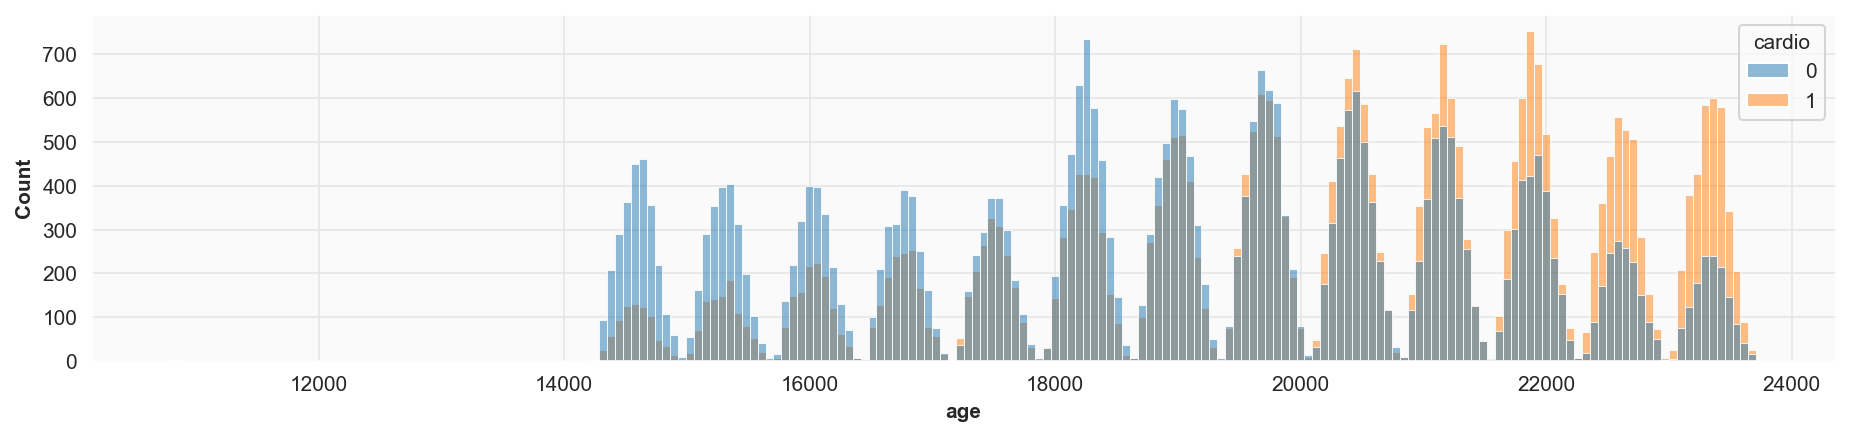

In [20]:
fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
sns.histplot(data=data_train, x='age', hue='cardio', bins=200);

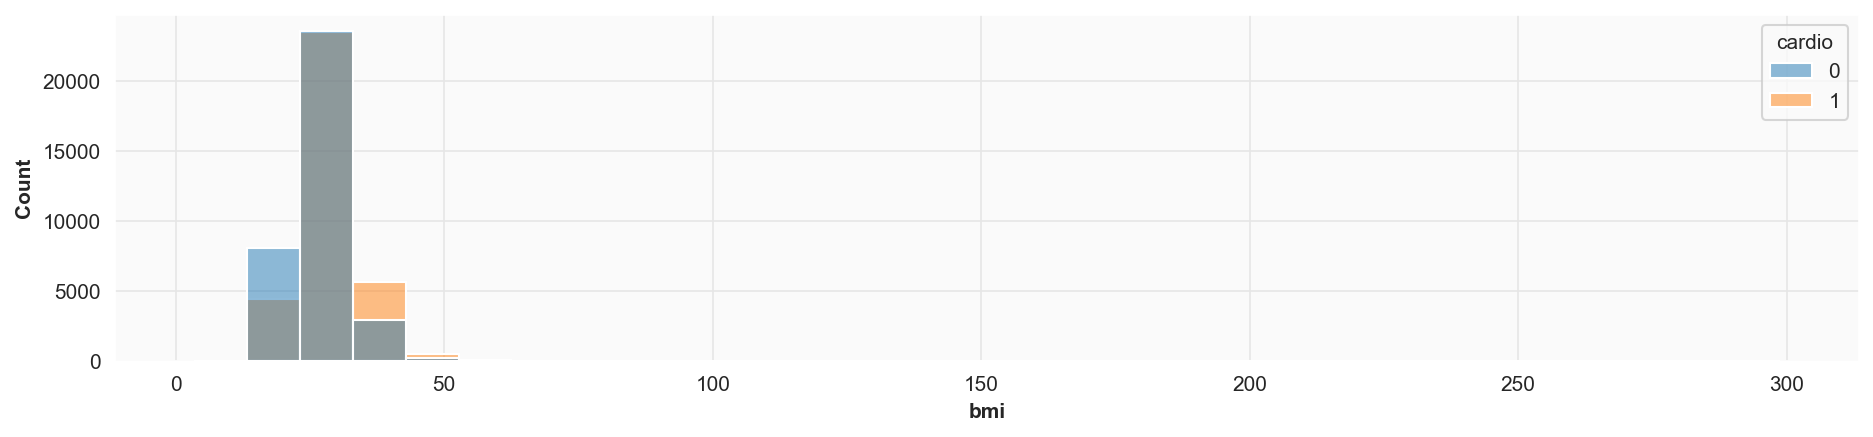

In [21]:
fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
sns.histplot(data=data_train, x='bmi', hue='cardio', bins=30);

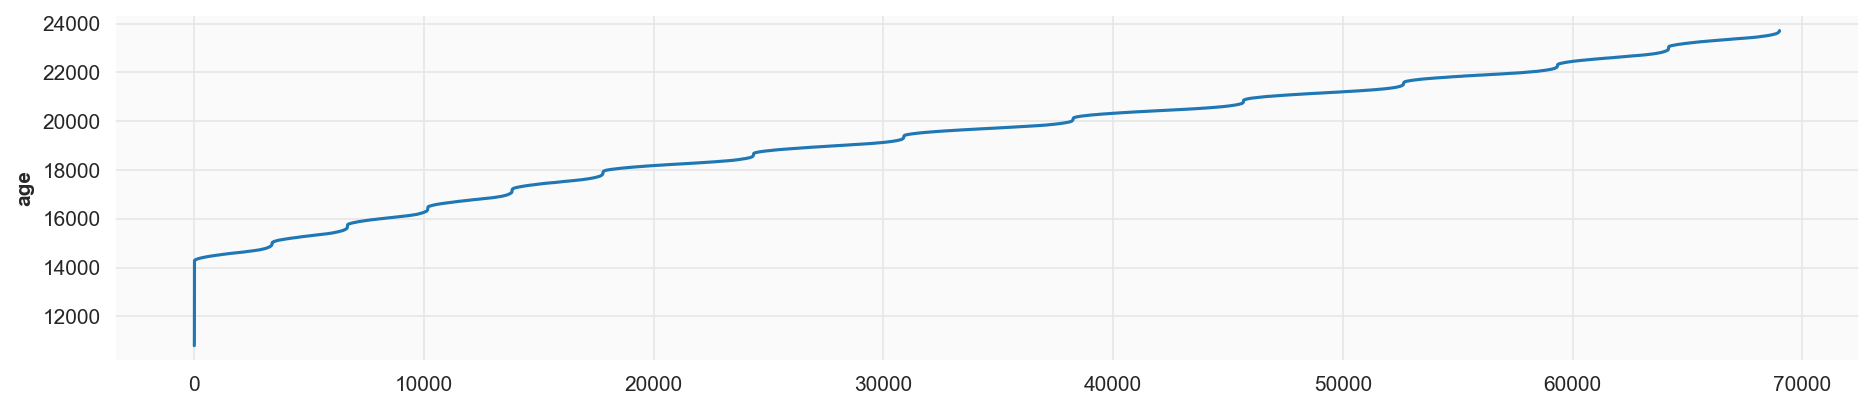

In [22]:
df = data_train.sort_values('age').reset_index()

fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
sns.lineplot(x=df.index, y=df.age);

## Minor improvements

### Convert `gender` values to `0`/`1`

In [23]:
data_train.gender = data_train.gender.map({1:1,2:0})
data_test.gender = data_test.gender.map({1:1,2:0})

### Convert `age` from days to years

An average of 365.25 days per year. Rounded to whole year.

In [24]:
data_train.age = (data_train.age / 365.25).round().astype('int8')
data_test.age = (data_test.age / 365.25).round().astype('int8')

### Convert `weight` type to integer

In [25]:
data_train.weight = data_train.weight.round().astype('int16')
data_test.weight = data_test.weight.round().astype('int16')


Графики разброса для признаков (train и test)



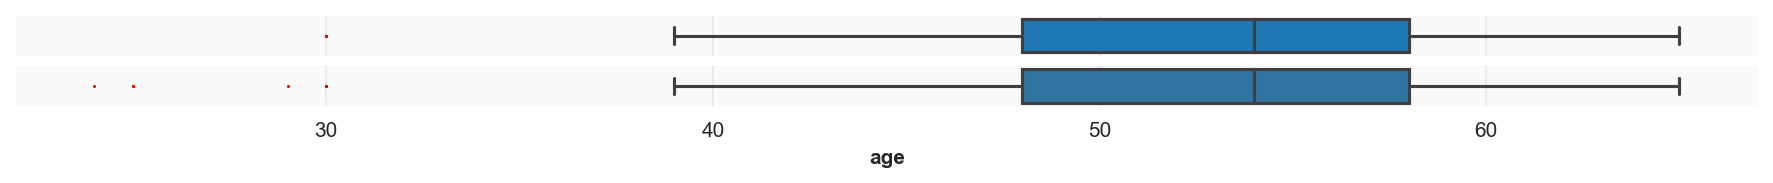

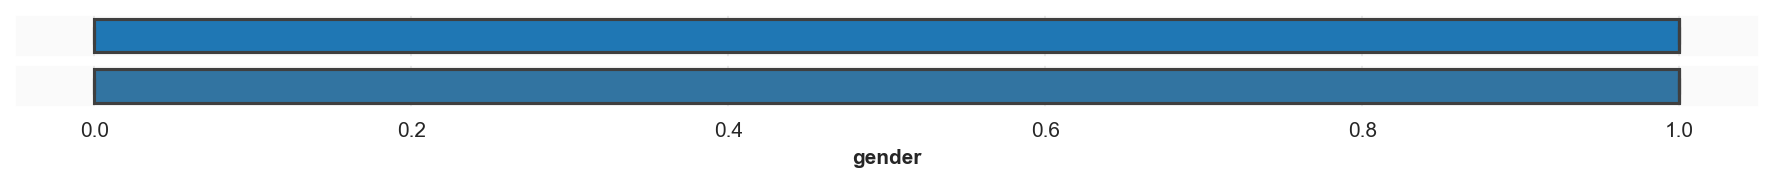

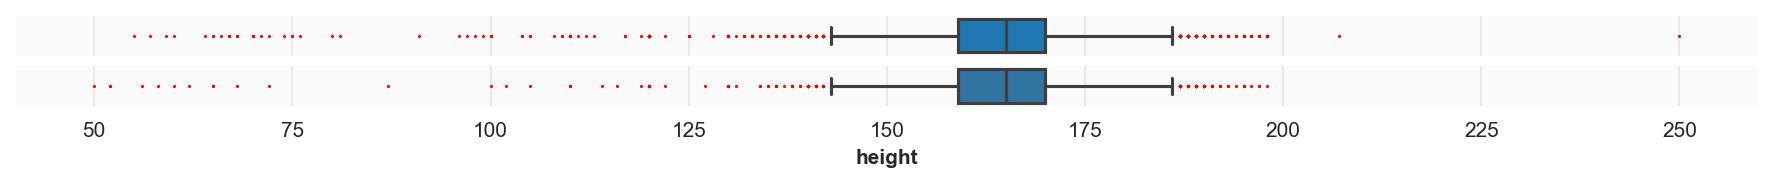

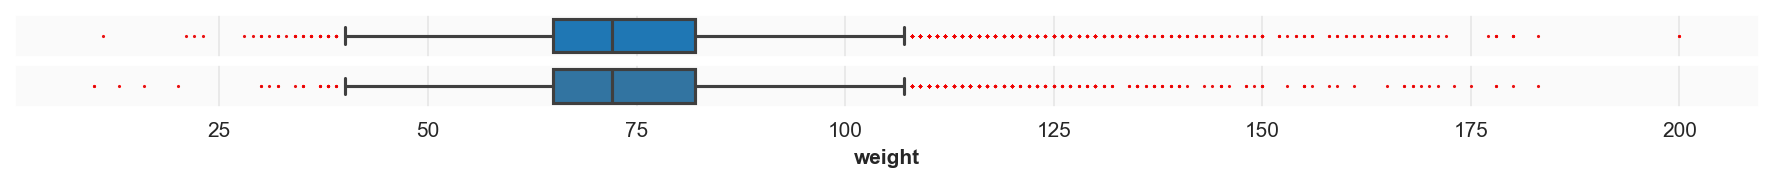

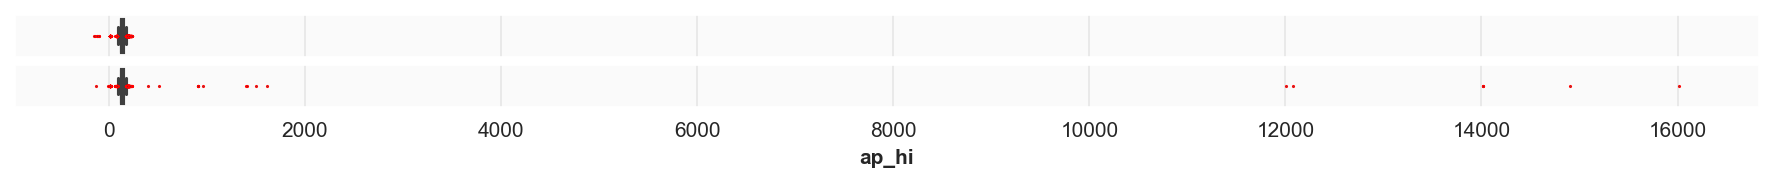

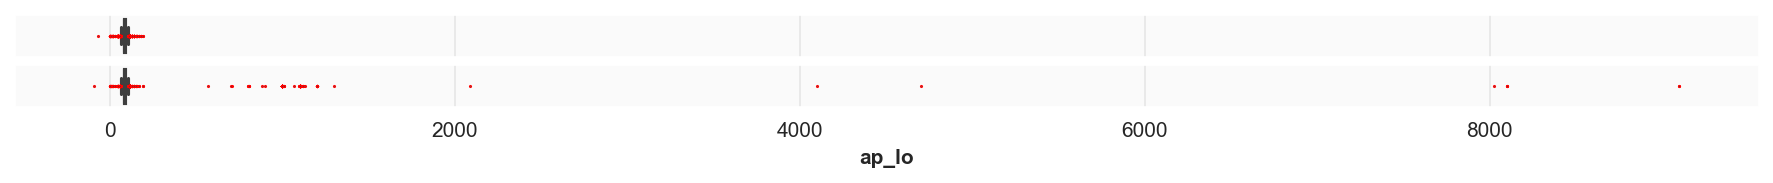

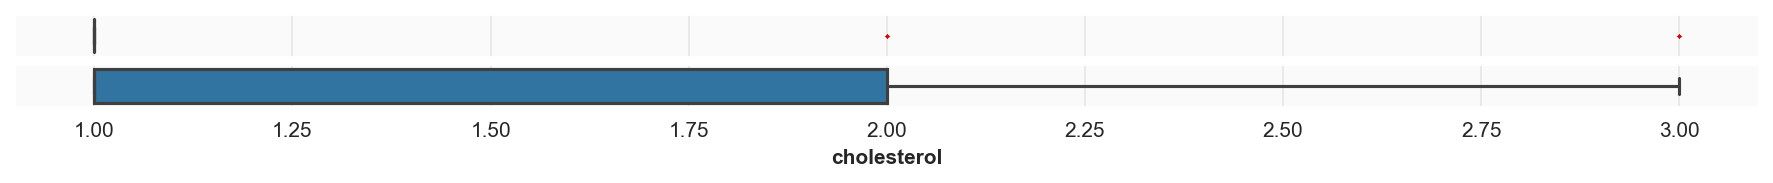

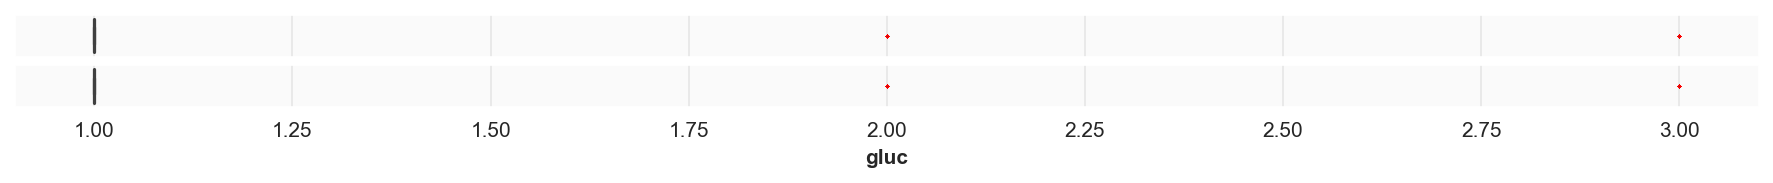

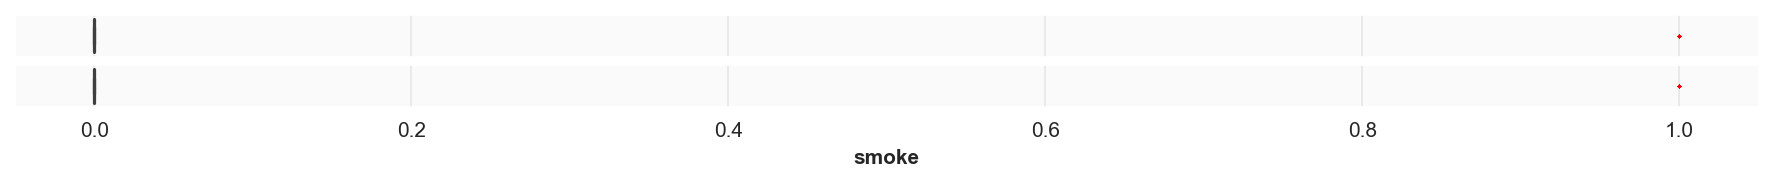

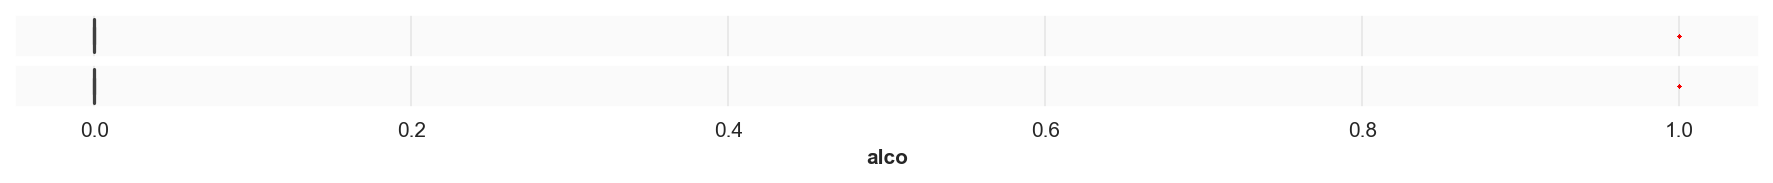

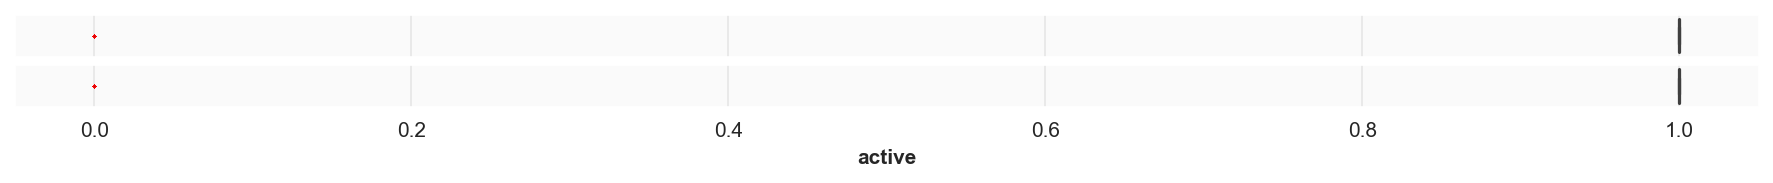

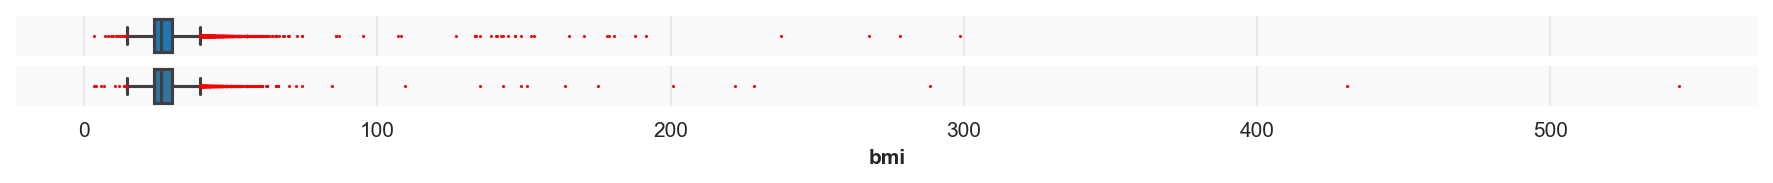

In [26]:
print(f'{CR}Графики разброса для признаков (train и test){CR}')
for feature in data_test.drop('id',axis=1).columns.to_list():
    fig, ax = plt.subplots(figsize=(15,0.8), dpi=PLOT_DPI, nrows=2, ncols=1, sharex=True)
    sns.boxplot(data=data_train, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, saturation=1, ax=ax[0])
    sns.boxplot(data=data_test, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, ax=ax[1])
    ax[0].set_xlabel('');

> Для большинства признаков явно выраженных проблем нет.  
> Распределения обучающей и тестовой выборок достаточно похожи.

> Признаки, которые необходимо дополнительно обработать:
> - **age**: крайне небольшое количество выбросов – можно удалить;
> - **height**: небольшое количество выбросов – можно удалить либо сделать clip;
> - **weight**: небольшое количество выбросов – можно удалить либо сделать clip;
> - **ap_hi** и **ap_lo**: небольшое количество выбросов – можно попробовать исправить ошибки, затем проанализировать заново
> - **bmi**: большое количество выбросов - можно попробовать исправить ошибки, затем проанализировать заново

### Коррекция ошибок

**`ap_hi`**, отрицательные значения

In [27]:
# отрицательные значения делаем положительными

data_train.ap_hi = data_train.ap_hi.abs()
data_test.ap_hi = data_test.ap_hi.abs()

**`ap_hi`**, максимальные значения

In [28]:
data_train[data_train.ap_hi > 300].shape[0], data_test[data_test.ap_hi > 300].shape[0]

(0, 19)

In [29]:
# раскомментировать, чтобы изучить результат
# значения больше 300
data_train[data_train.ap_hi > 300].sort_values('ap_hi', ascending=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


In [30]:
# # раскомментировать, чтобы изучить результат
# # значения больше 300
# data_test[data_test.ap_hi > 300].sort_values('ap_hi', ascending=False)

In [31]:
# значения больше 3000 делим на 100

idx = data_train[data_train.ap_hi > 3000].index
data_train.loc[idx, 'ap_hi'] = round(data_train.loc[idx, 'ap_hi'] / 100)

idx = data_test[data_test.ap_hi > 3000].index
data_test.loc[idx, 'ap_hi'] = round(data_test.loc[idx, 'ap_hi'] / 100)

In [32]:
# значения больше 300 делим на 10

idx = data_train[data_train.ap_hi > 300].index
data_train.loc[idx, 'ap_hi'] = round(data_train.loc[idx, 'ap_hi'] / 10)

idx = data_test[data_test.ap_hi > 300].index
data_test.loc[idx, 'ap_hi'] = round(data_test.loc[idx, 'ap_hi'] / 10)

> Если больше 3000 – делим на 100.  
> Если больше 300 – делим на 10.  

> Происхождение некоторых ошибок, как и их исправление, очевидно. Но поскольку таких ошибок крайне мало, проще не заморачиваться и удалить.

**`ap_hi`**, минимальные значения

In [33]:
# всего значений меньше 50
data_train[data_train.ap_hi < 50].shape[0], data_test[data_test.ap_hi < 50].shape[0]

(178, 81)

In [34]:
# раскомментировать, чтобы изучить результат
# значения меньше 50
data_train[data_train.ap_hi < 50].sort_values('ap_hi', ascending=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
52851,75399,49,0,164,64,24,20,3,1,0,0,1,1,23.795
37329,53316,52,0,175,104,20,90,1,2,0,0,1,1,33.959
24850,35489,58,0,170,100,20,80,1,1,0,0,0,1,34.602
17872,25543,56,0,181,79,20,80,1,1,0,0,1,1,24.114
31315,44701,62,1,163,115,20,170,1,1,0,0,1,1,43.284
8280,11819,64,1,160,81,17,80,1,1,0,0,1,1,31.641
56635,80848,56,0,190,90,17,80,1,1,0,0,1,1,24.931
57482,82040,65,0,170,100,17,90,2,1,0,0,0,1,34.602
26513,37874,52,1,157,69,16,10,3,1,0,0,1,1,27.993
8349,11920,62,1,169,68,16,90,2,1,0,0,1,1,23.809


In [35]:
# раскомментировать, чтобы изучить результат
# значения меньше 50
data_test[data_test.ap_hi < 50].sort_values('ap_hi', ascending=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
303,1079,62,0,170,74,40,60,1,1,0,0,1,25.606
2943,9856,50,1,160,65,20,80,1,1,0,0,0,25.391
19712,65738,60,1,165,60,19,80,1,1,0,0,1,22.039
8295,27649,54,0,162,70,17,12,1,1,0,0,1,26.673
14177,47235,54,0,167,70,17,90,1,1,1,1,0,25.100
25932,86569,42,0,160,60,17,100,2,1,1,1,1,23.437
6400,21287,54,0,168,70,16,10,3,3,1,0,1,24.802
25015,83595,57,1,167,91,16,100,2,2,0,0,1,32.629
2443,8272,58,1,165,72,16,10,3,3,0,0,1,26.446
12290,40877,43,1,154,62,15,90,1,1,0,0,1,26.143


In [36]:
# значения от 10 до 24 умножаем на 10

idx = data_train[(data_train.ap_hi >= 6) & (data_train.ap_hi <= 30)].index
data_train.loc[idx, 'ap_hi'] = data_train.loc[idx, 'ap_hi'] * 10

idx = data_test[(data_test.ap_hi >= 6) & (data_test.ap_hi <= 30)].index
data_test.loc[idx, 'ap_hi'] = data_test.loc[idx, 'ap_hi'] * 10

In [37]:
# раскомментировать, чтобы изучить результат
# значения меньше 50
data_train[data_train.ap_hi < 50].sort_values('ap_hi', ascending=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


In [38]:
# раскомментировать, чтобы изучить результат
# значения меньше 50
data_test[data_test.ap_hi < 50].sort_values('ap_hi', ascending=False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
303,1079,62,0,170,74,40,60,1,1,0,0,1,25.606
1929,6580,52,1,176,92,1,1099,1,1,0,0,1,29.700
12852,42755,52,1,158,61,1,30,1,1,0,0,1,24.435
15510,51749,50,1,169,62,1,2088,1,1,0,0,1,21.708


In [39]:
# удаляем оставшиеся значения меньше 50
# в тестовой выборке данные удалять нельзя! исправляем вручную

data_train = data_train[~(data_train.ap_hi < 50)]

data_test.loc[303,'ap_hi'], data_test.loc[303,'ap_lo'] = 90, 60
# data_test.loc[1929,'ap_hi'], data_test.loc[1929,'ap_lo'] = 190, 100
# data_test.loc[12852,'ap_hi'], data_test.loc[12852,'ap_lo'] = 130, 90
# data_test.loc[15510,'ap_hi'], data_test.loc[15510,'ap_lo'] = 120, 80

> Значения исправили.

**`ap_lo`**, отрицательные значения

In [40]:
# отрицательные значения делаем положительными

data_train.ap_lo = data_train.ap_lo.abs()
data_test.ap_lo = data_test.ap_lo.abs()

**`ap_lo`**, максимальные значения

In [41]:
# количеество значений больше 200
data_train[data_train.ap_lo > 200].shape[0], data_test[data_test.ap_lo > 200].shape[0]

(0, 402)

In [42]:
# раскомментировать, чтобы изучить результат
# значения больше 200
display(data_train[data_train.ap_lo > 200].sort_values('ap_lo', ascending=False).head(10))
display(data_train[data_train.ap_lo > 200].sort_values('ap_lo', ascending=False).tail(10))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi


In [43]:
# # раскомментировать, чтобы изучить результат
# # значения больше 200
# display(data_test[data_test.ap_lo > 200].sort_values('ap_lo', ascending=False).head(10))
# display(data_test[data_test.ap_lo > 200].sort_values('ap_lo', ascending=False).tail(10))

In [44]:
# значения больше 2000 делим на 100

idx = data_train[data_train.ap_lo > 2000].index
data_train.loc[idx, 'ap_lo'] = round(data_train.loc[idx, 'ap_lo'] / 100)

idx = data_test[data_test.ap_lo > 2000].index
data_test.loc[idx, 'ap_lo'] = round(data_test.loc[idx, 'ap_lo'] / 100)

In [45]:
# значения больше 200 делим на 10

idx = data_train[data_train.ap_lo > 200].index
data_train.loc[idx, 'ap_lo'] = round(data_train.loc[idx, 'ap_lo'] / 10)

idx = data_test[data_test.ap_lo > 200].index
data_test.loc[idx, 'ap_lo'] = round(data_test.loc[idx, 'ap_lo'] / 10)

**`ap_lo`**, минимальные значения

In [46]:
# всего значений меньше 20
data_train[data_train.ap_lo < 20].shape[0], data_test[data_test.ap_lo < 20].shape[0]

(30, 19)

In [47]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 20
# data_train[data_train.ap_lo < 20].sort_values('ap_lo', ascending=False)

In [48]:
# # раскомментировать, чтобы изучить результат
# # значения меньше 20
# data_test[data_test.ap_lo < 20].sort_values('ap_lo', ascending=False)

In [49]:
# значения от 3 до 10 умножаем на 10

idx = data_train[(data_train.ap_lo >= 3) & (data_train.ap_lo <= 20)].index
data_train.loc[idx, 'ap_lo'] = data_train.loc[idx, 'ap_lo'] * 10

idx = data_test[(data_test.ap_lo >= 3) & (data_test.ap_lo <= 20)].index
data_test.loc[idx, 'ap_lo'] = data_test.loc[idx, 'ap_lo'] * 10

In [50]:
# замена неисправимых значений на средние с учетом признаков gender, age и weight

# временное поле ap_lo_mean – среднее с учетом признаков gender, age и weight
data_train['ap_lo_mean'] = data_train.groupby(['gender','age','weight']).ap_lo.transform('mean').round()

# data_train: фильтр на значения, замена ap_lo на ap_lo_mean
idx = data_train[data_train.ap_lo < 3].index
data_train.loc[idx, 'ap_lo'] = data_train.loc[idx, 'ap_lo_mean']

# data_test: фильтр на значения, присоединение ap_lo_mean, замена ap_lo на ap_lo_mean
idx = data_test[data_test.ap_lo < 3].index
data_test = data_test.merge(data_train[['gender','age','weight','ap_lo_mean']].drop_duplicates(), on=['gender','age','weight'], how='left')
data_test.loc[idx, 'ap_lo'] = data_test.loc[idx, 'ap_lo_mean']

# удаление временного поля ap_lo_mean
data_train = data_train.drop('ap_lo_mean', axis=1)
data_test = data_test.drop('ap_lo_mean', axis=1)

**`ap_hi`** меньше **`ap_lo`** (чего быть не должно)

In [51]:
# верхнее давление меньше нижнего? количество значений
data_train[data_train.ap_hi < data_train.ap_lo].shape[0], data_test[data_test.ap_hi < data_test.ap_lo].shape[0]

(122, 59)

In [52]:
# # # раскомментировать, чтобы изучить результат
# # верхнее давление меньше нижнего
# data_train[data_train.ap_hi < data_train.ap_lo]

In [53]:
# # # раскомментировать, чтобы изучить результат
# # верхнее давление меньше нижнего
# data_test[data_test.ap_hi < data_test.ap_lo]

In [54]:
# меняем местами ap_hi и ap_lo

idx = data_train[data_train.ap_hi < data_train.ap_lo].index
data_train.loc[idx, ['ap_hi','ap_lo']] = data_train.loc[idx, ['ap_lo','ap_hi']].values

idx = data_test[data_test.ap_hi < data_test.ap_lo].index
data_test.loc[idx, ['ap_hi','ap_lo']] = data_test.loc[idx, ['ap_lo','ap_hi']].values

In [55]:
# верхнее давление равно нижнему

display(data_train[data_train.ap_hi == data_train.ap_lo])
display(data_test[data_test.ap_hi == data_test.ap_lo])

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
12785,18238,43,0,178,105,100,100,1,1,0,0,0,1,33.140
32190,45975,63,1,162,120,100,100,1,1,0,0,1,0,45.725


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
348,1230,64,1,156,78,100,100,1,1,0,0,1,32.051
7072,23573,56,0,167,62,100,100,2,1,0,0,1,22.231
7476,24916,50,0,162,86,110,110,1,1,0,0,1,32.769


In [56]:
data_train = data_train[~(data_train.ap_hi == data_train.ap_lo)]

In [57]:
data_train.weight = data_train.weight.round().astype('int16')
# display(data_train)


Графики разброса для признаков ap_hi и ap_lo



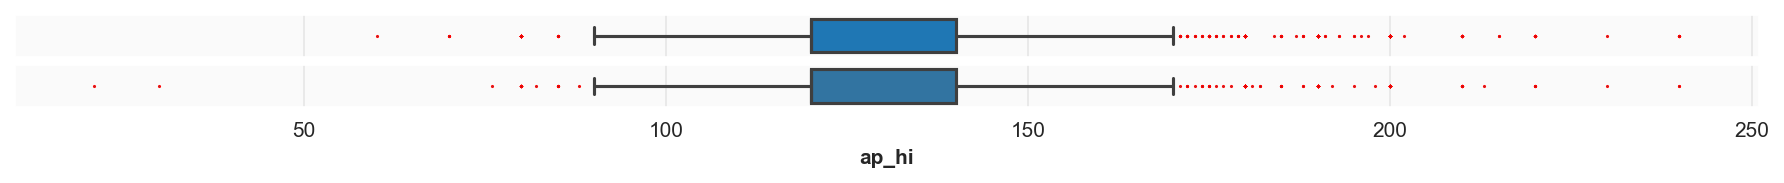

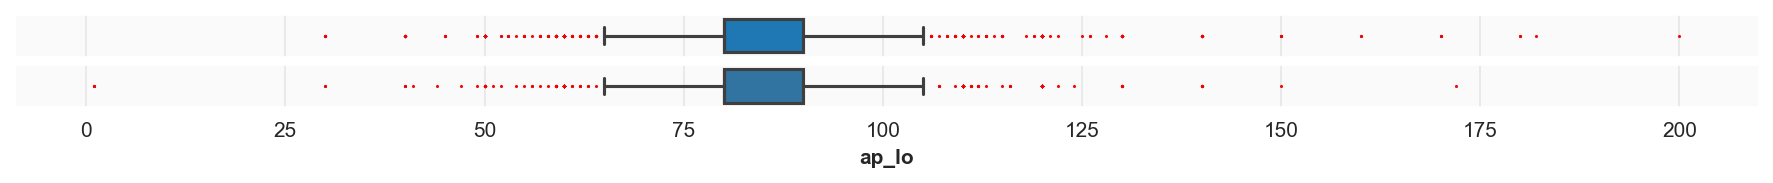

In [58]:
print(f'{CR}Графики разброса для признаков ap_hi и ap_lo{CR}')
for feature in ['ap_hi','ap_lo']:
    fig, ax = plt.subplots(figsize=(15,0.8), dpi=PLOT_DPI, nrows=2, ncols=1, sharex=True)
    sns.boxplot(data=data_train, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, saturation=1, ax=ax[0])
    sns.boxplot(data=data_test, x=feature, flierprops={'marker':'.','markeredgecolor':'red','markersize':1}, ax=ax[1])
    ax[0].set_xlabel('');

### Распределения признаков

In [59]:
# временная таблица с числовыми признаками (уместно, если присутствуют и категориальные признаки)

num_fields = data_train.select_dtypes(include=[np.number]).columns.to_list()
df = data_train[num_fields]

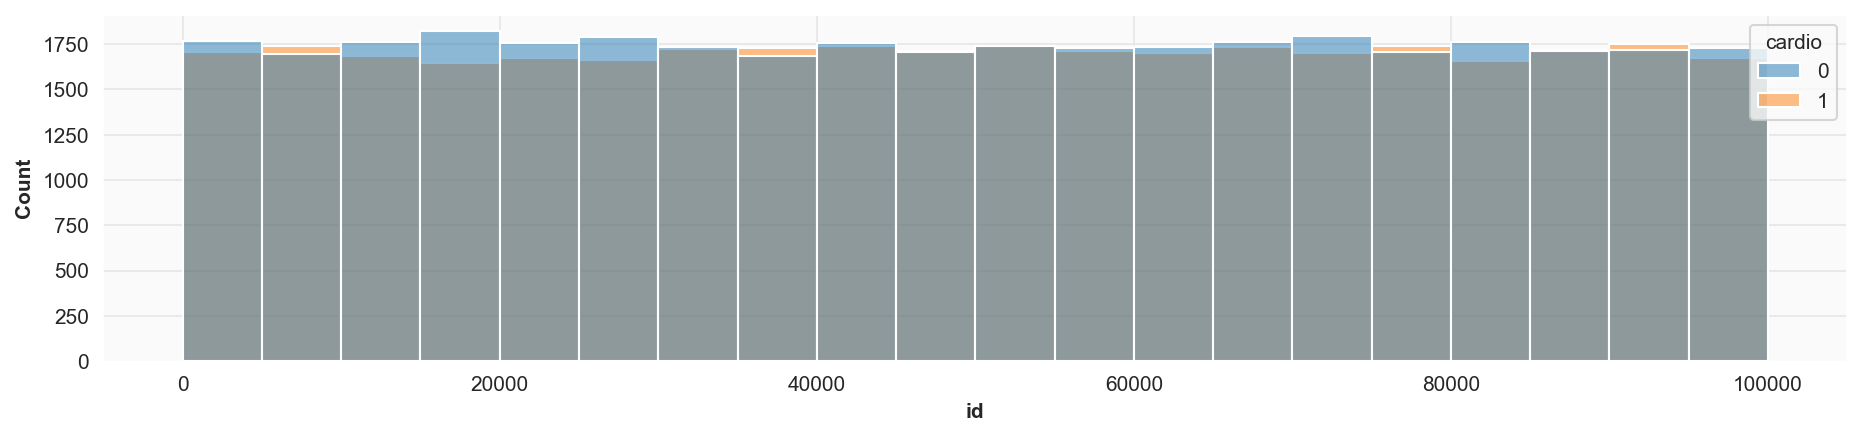

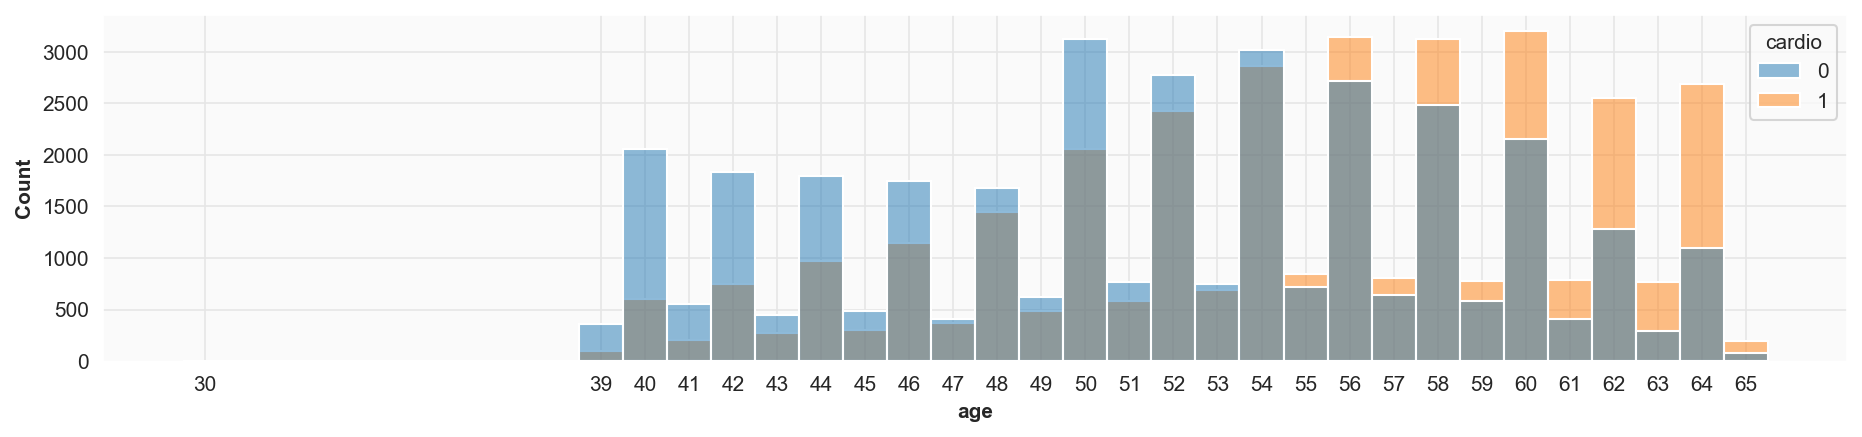

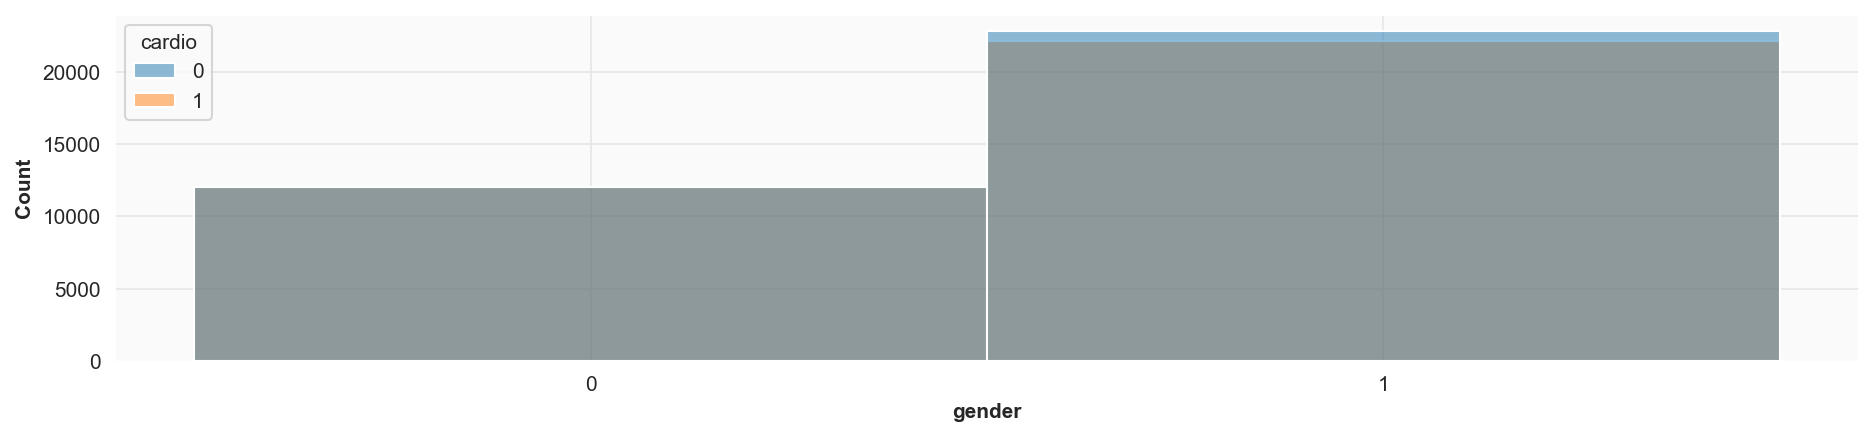

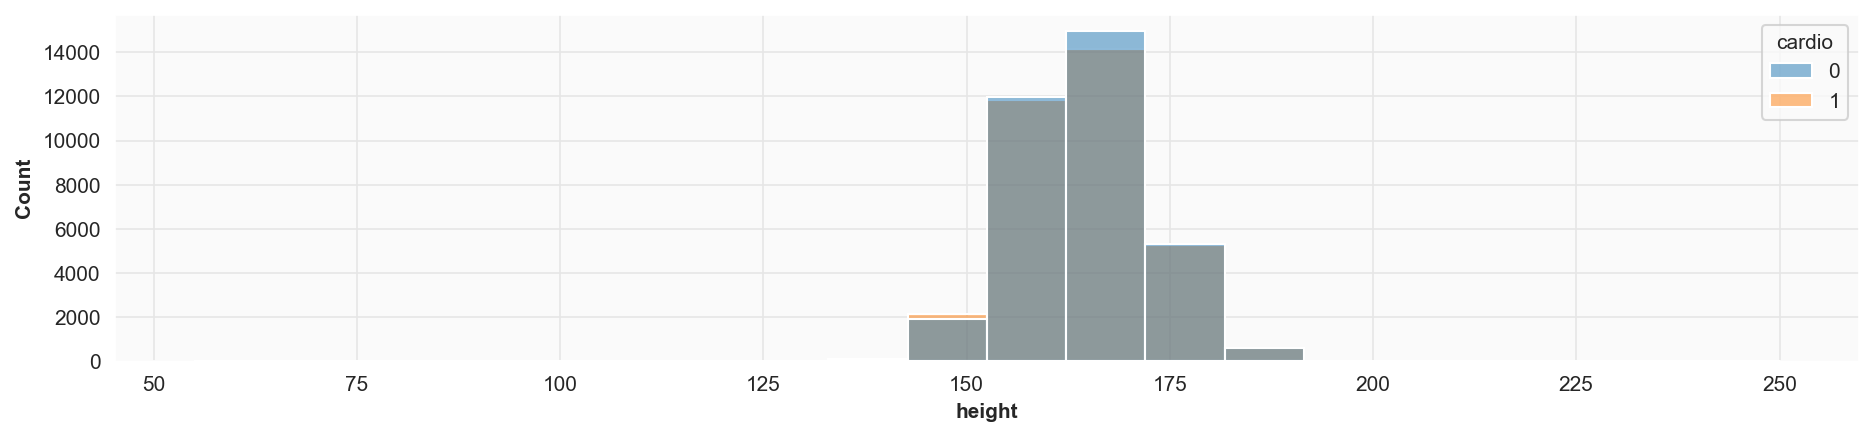

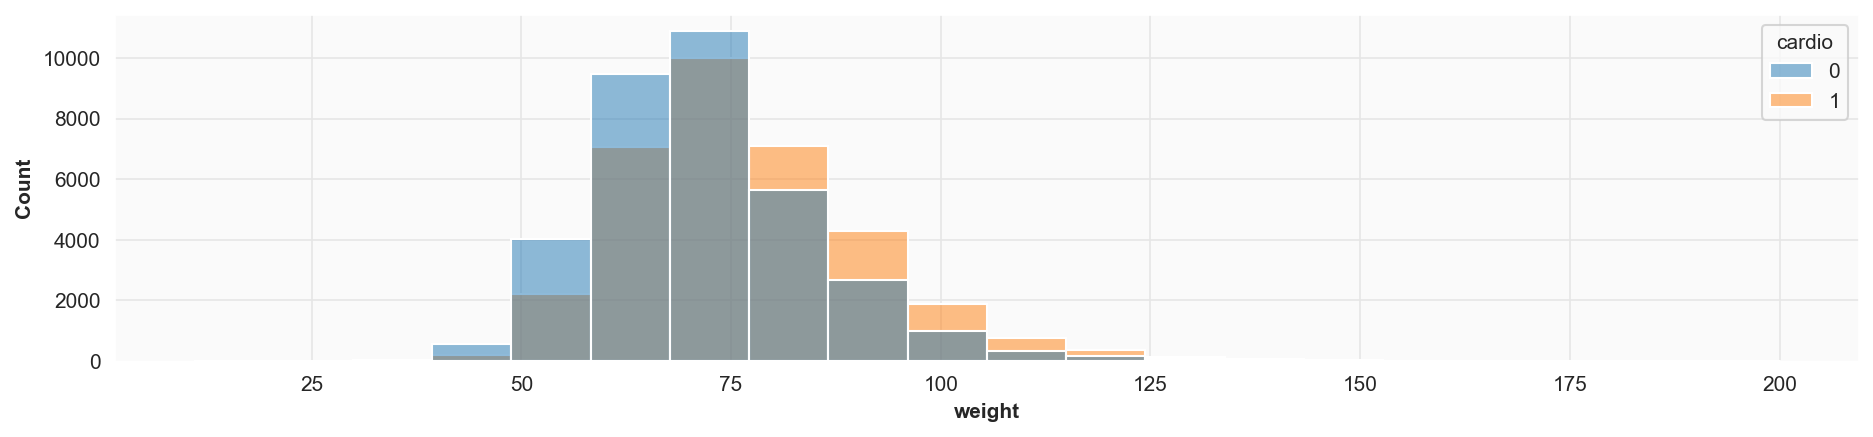

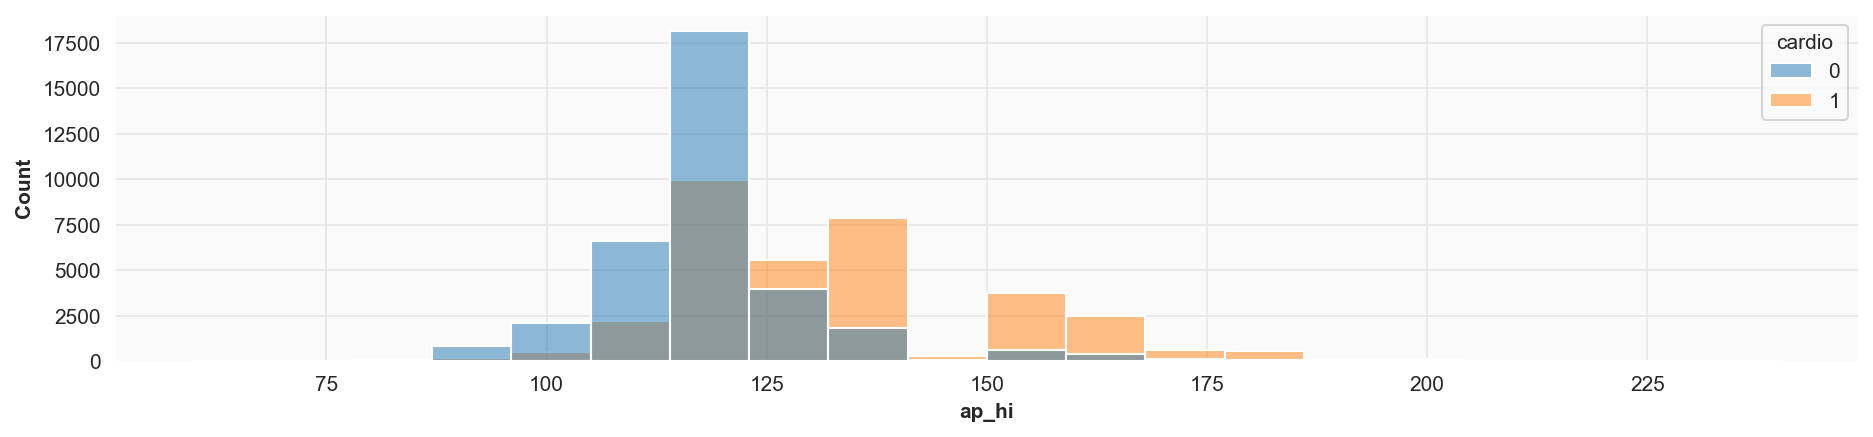

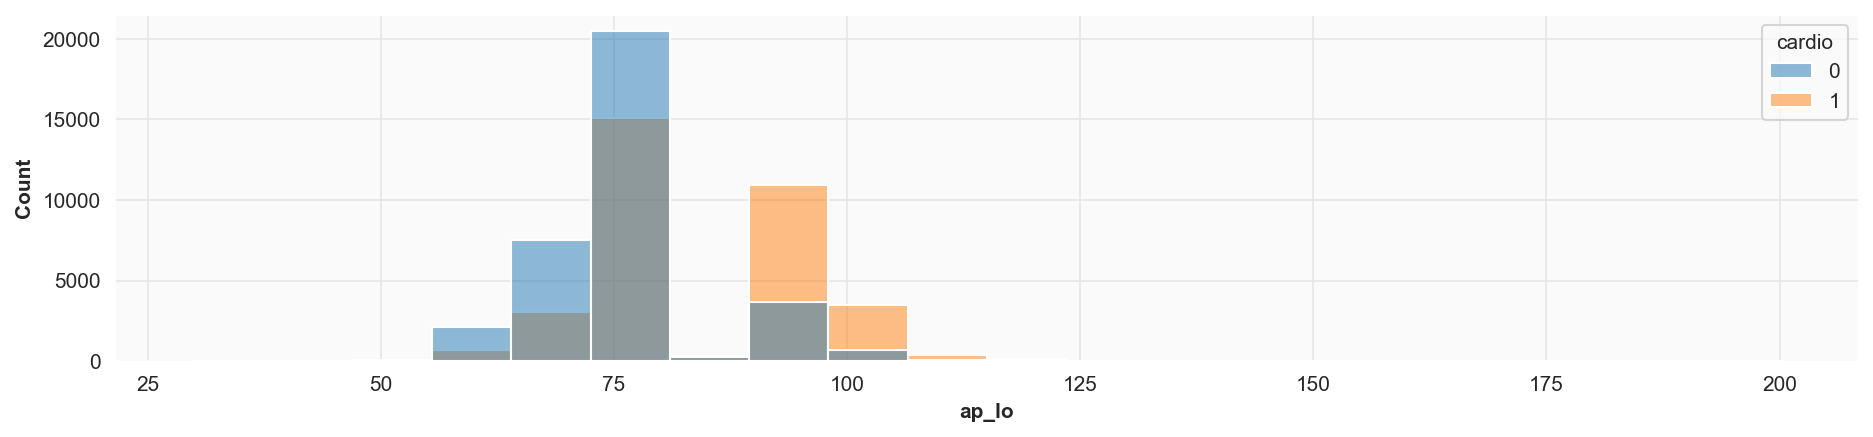

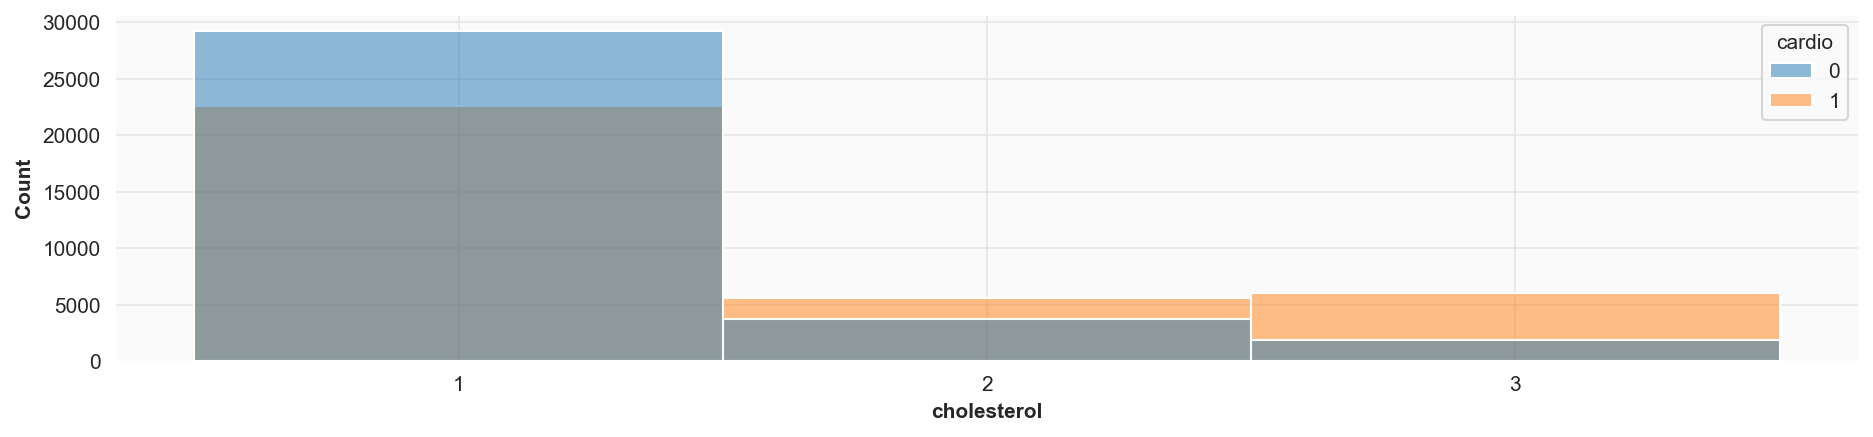

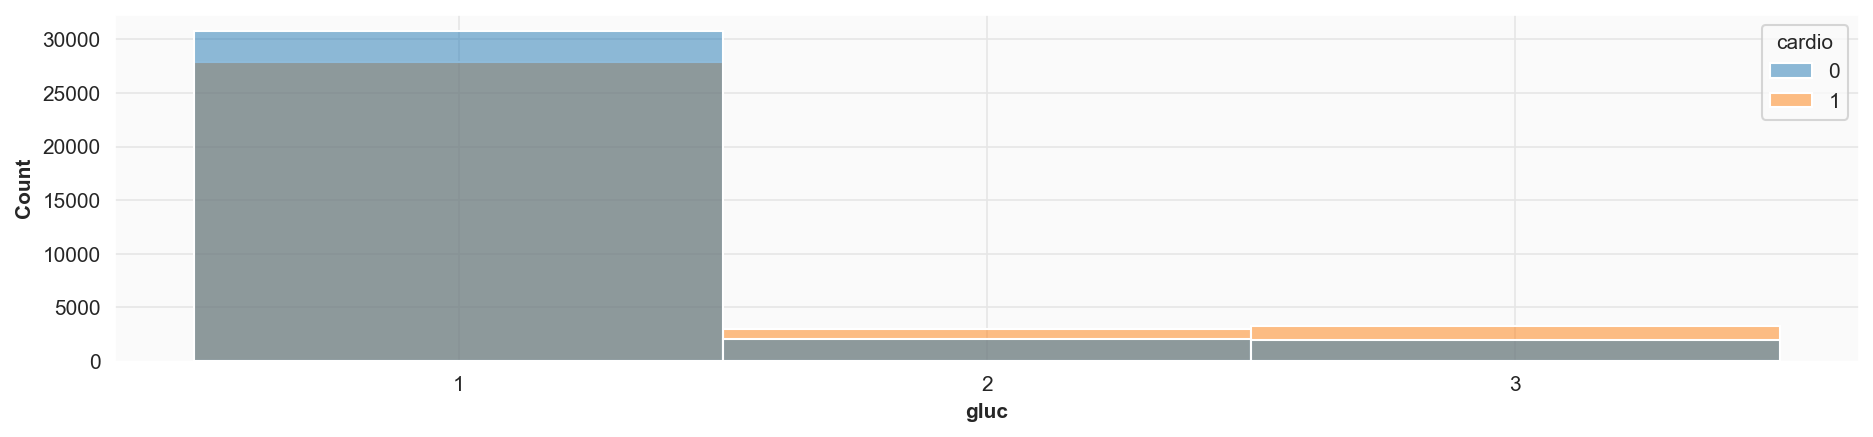

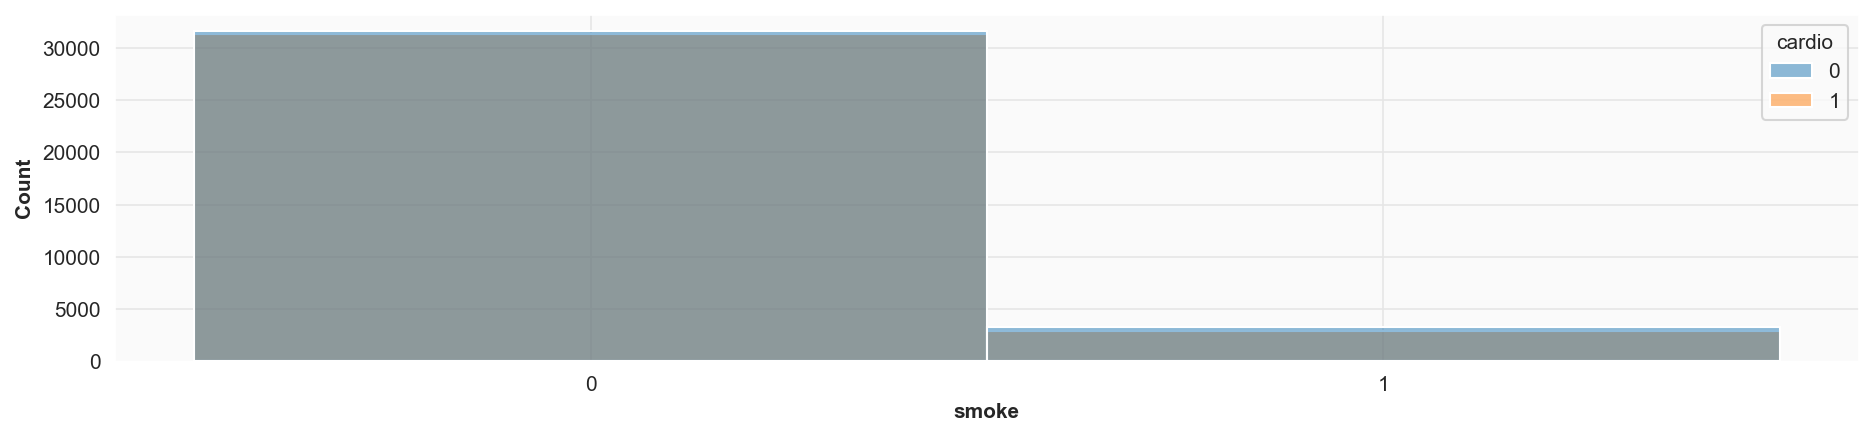

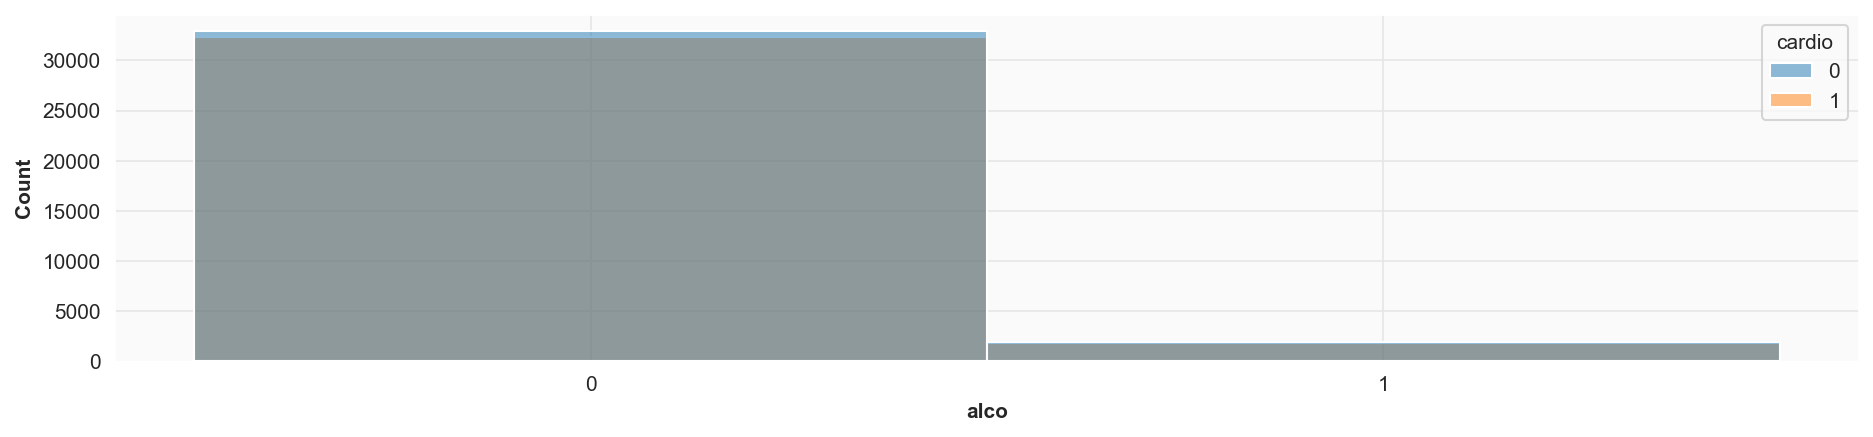

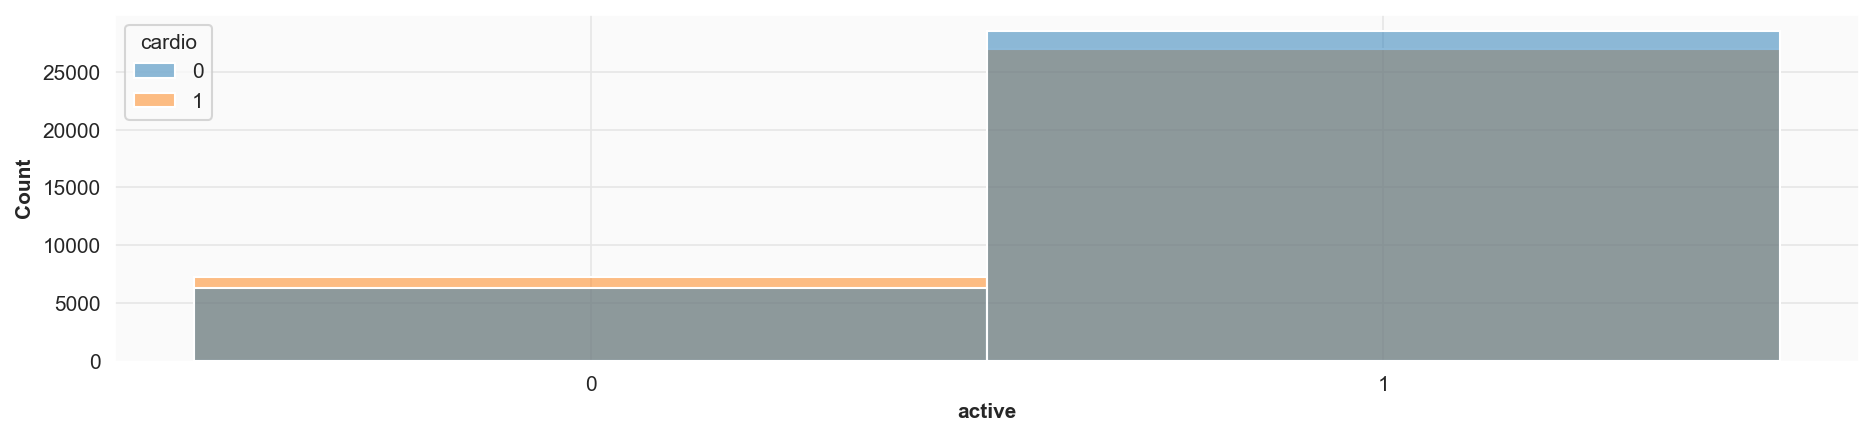

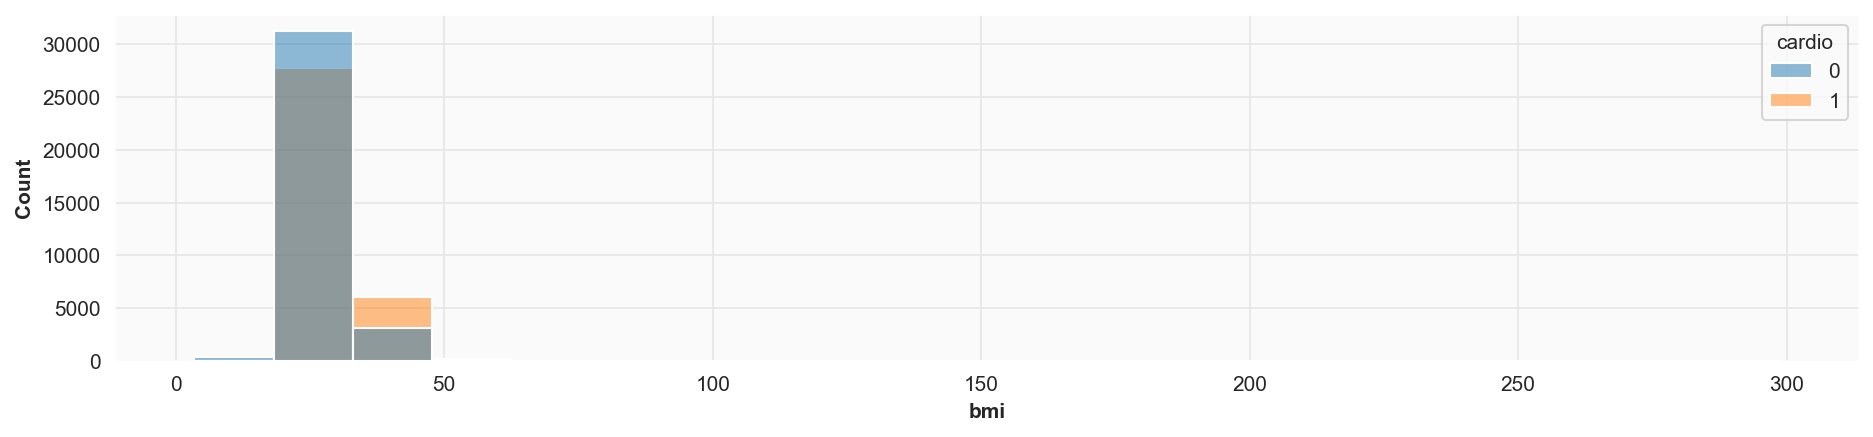

In [60]:
for column in df.drop('cardio', axis=1).columns:
    
    # подбор количества корзин для лучшего восприятия
    bins_treshold = 50
    is_discrete = True if df[column].nunique() < bins_treshold else False
    
    fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
    sns.histplot(x=df[column], hue=df.cardio, bins=20, discrete=is_discrete)
    
    if df[column].nunique() < bins_treshold:
        ax.set_xticks(df[column].unique());

> В чистом виде перспективно выглядят признаки:
> - **age**;
> - **weight**;
> - **ap_hi**;
> - **ap_lo**;
> - **cholesterol**;
> - **gluc**;
> - **bmi**.

### Pair charts

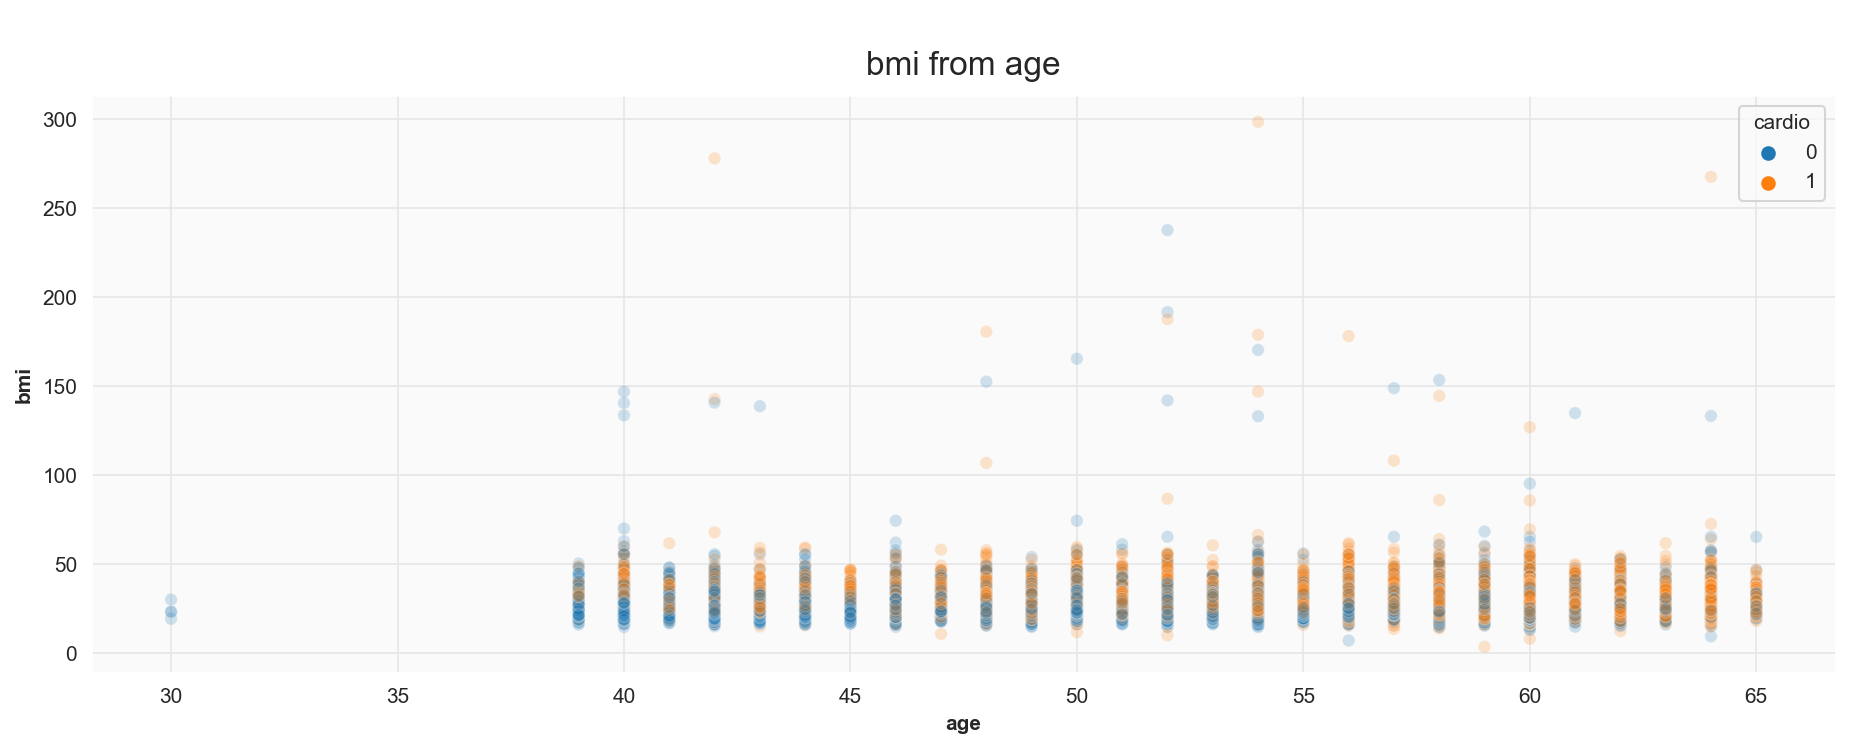

In [61]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='bmi', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}bmi from age')

plt.show()

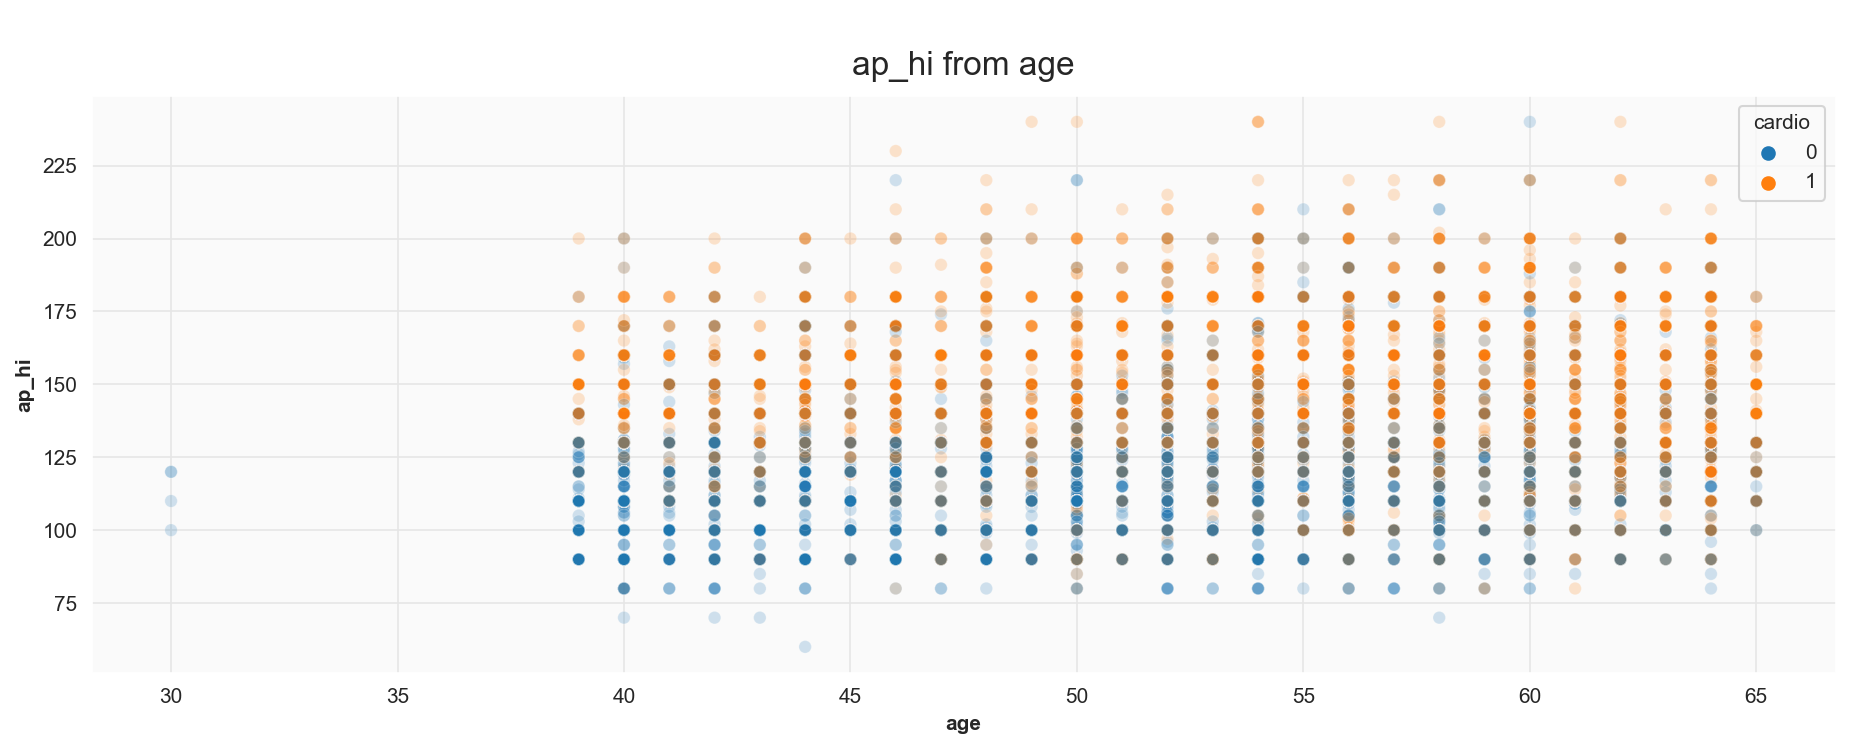

In [62]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='ap_hi', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}ap_hi from age')

plt.show()

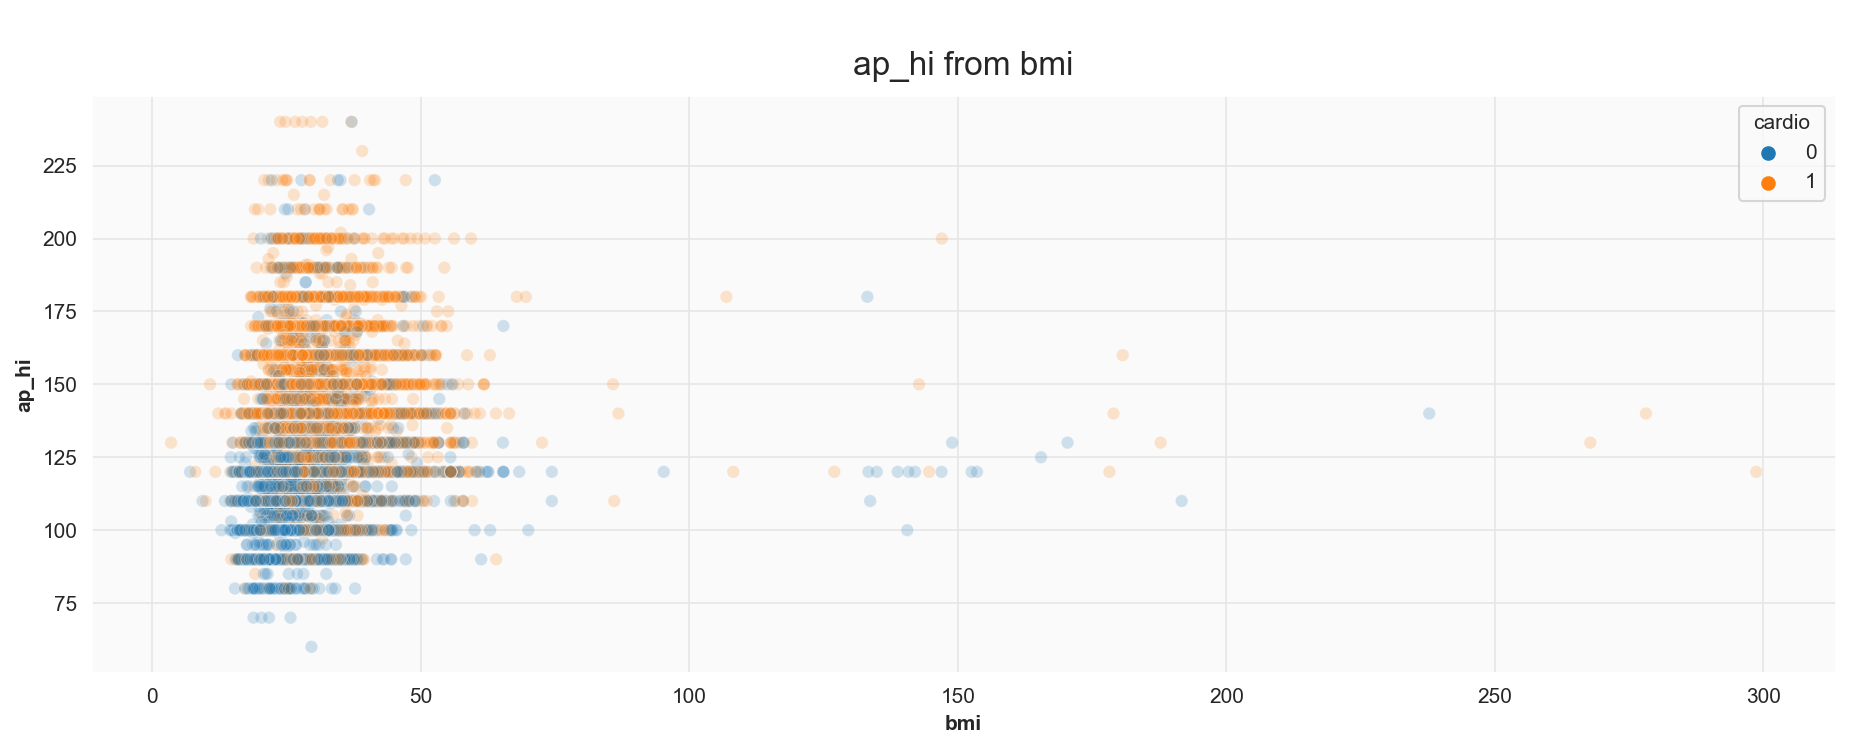

In [63]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='bmi', y='ap_hi', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}ap_hi from bmi')

plt.show()

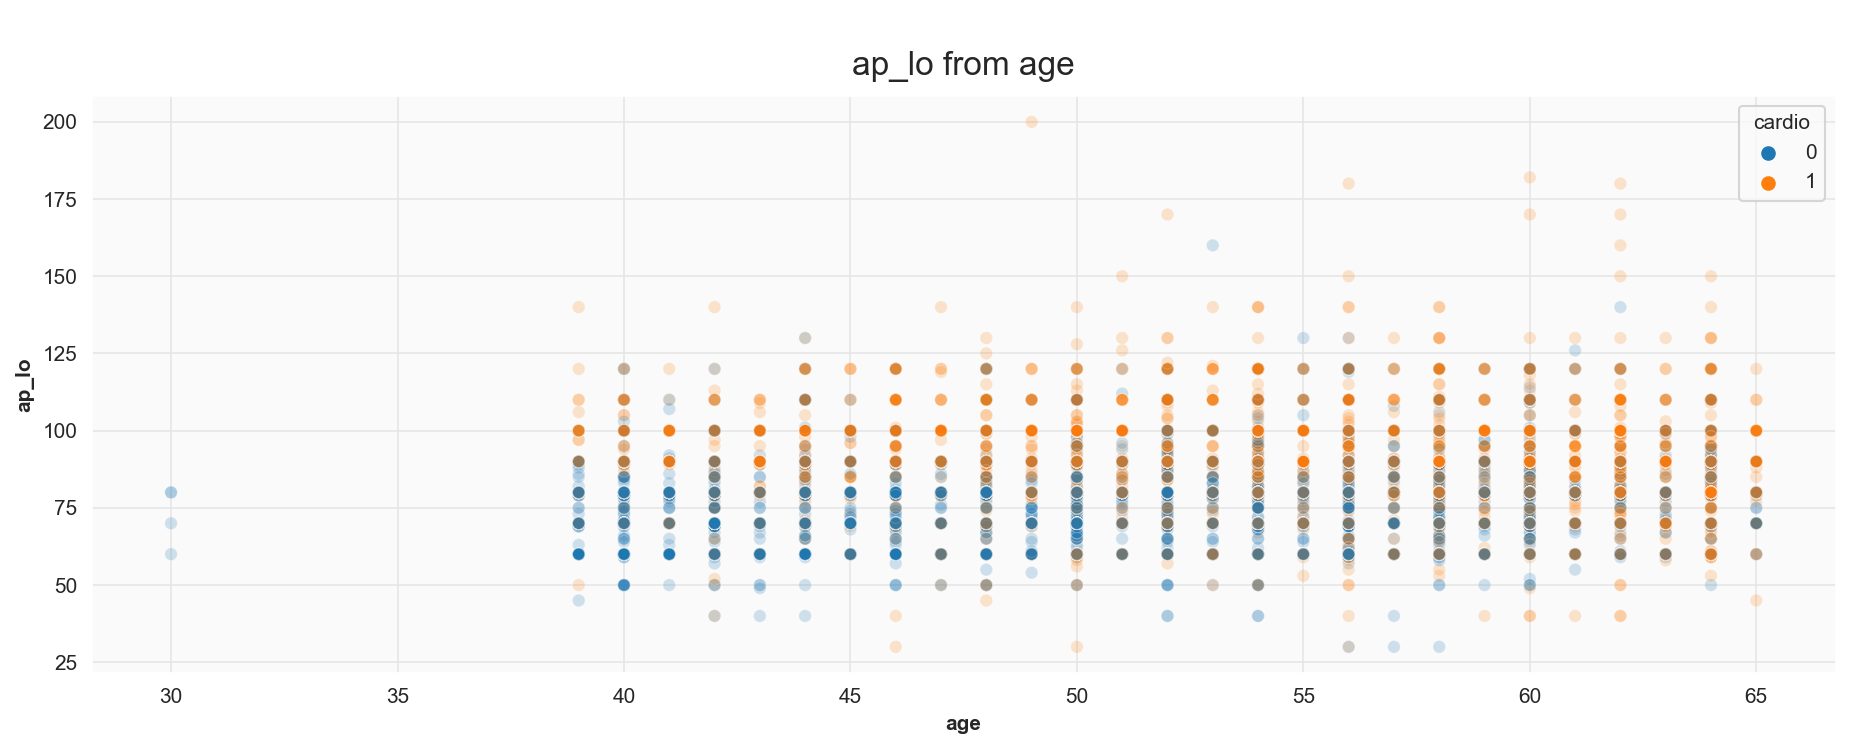

In [64]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='ap_lo', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}ap_lo from age')

plt.show()

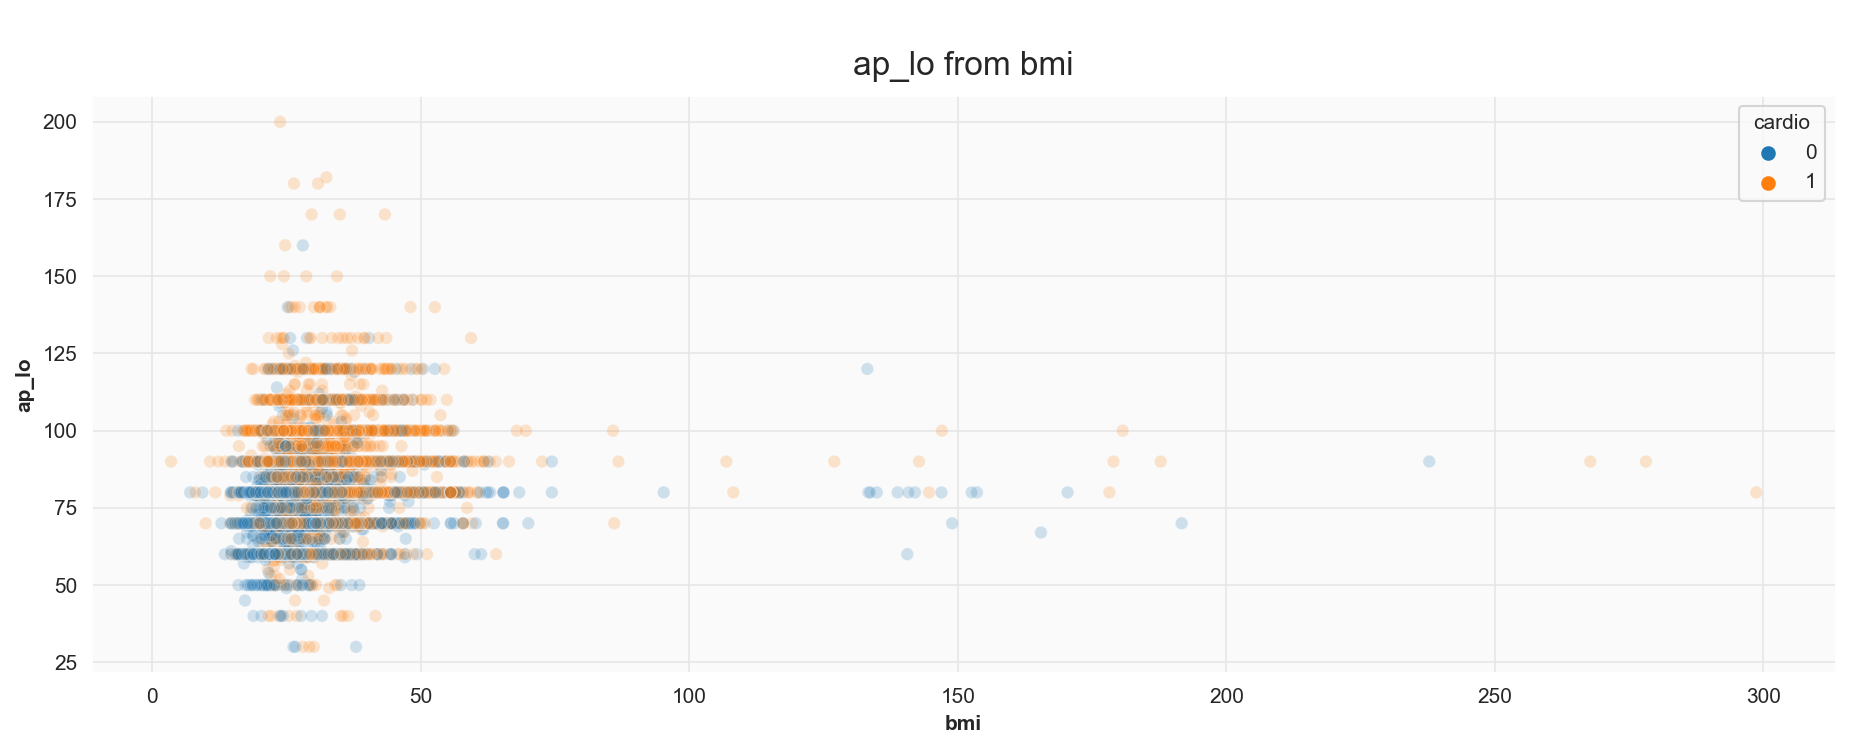

In [65]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='bmi', y='ap_lo', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}ap_lo from bmi')

plt.show()

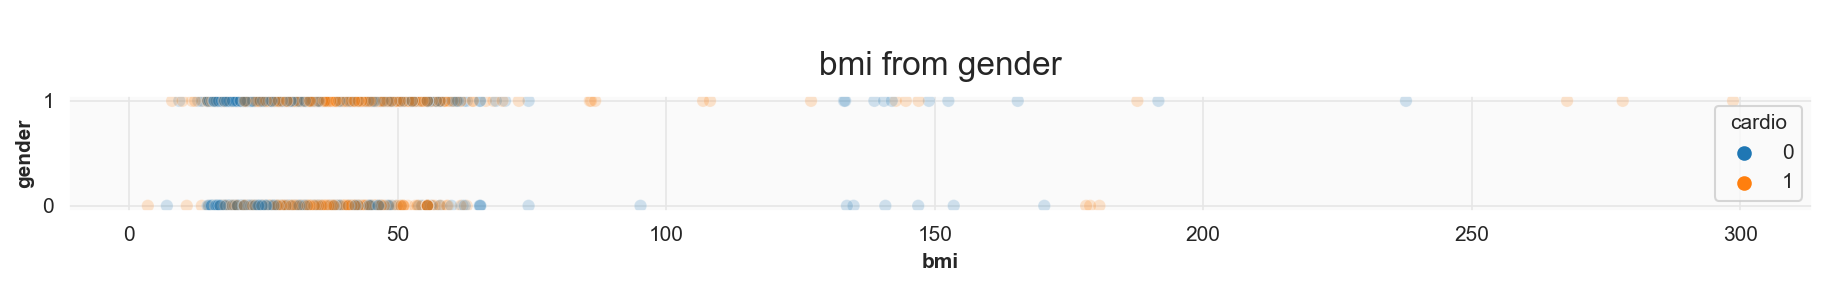

In [66]:
fig, ax = plt.subplots(figsize=(15,1), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='bmi', y='gender', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}bmi from gender')

plt.show()

## Clip, remap, round data

Клиппинг, ремапинг и округление данных для большей обобщающей способности. 

In [67]:
for df in [data_train, data_test]:
    
    df.age = df.age.clip(39,65)
    df.weight = df.weight.clip(40,200)
#     df.height = df.height.clip(145,185)
    df.ap_hi = df.ap_hi.clip(70,200)
    df.ap_lo = df.ap_lo.clip(40,130)
    
#     df.gluc = df.gluc.map({1:1,2:2,3:2})    # категории 2 и 3 распределены похоже (и обе малочисленны)
    
    df.ap_hi = df.ap_hi.round(-1)
    df.ap_lo = df.ap_lo.round(-1)

### Повторные графики распределения признаков

In [68]:
# временная таблица с числовыми признаками (уместно, если присутствуют и категориальные признаки)

num_fields = data_train.select_dtypes(include=[np.number]).columns.to_list()
df = data_train[num_fields]

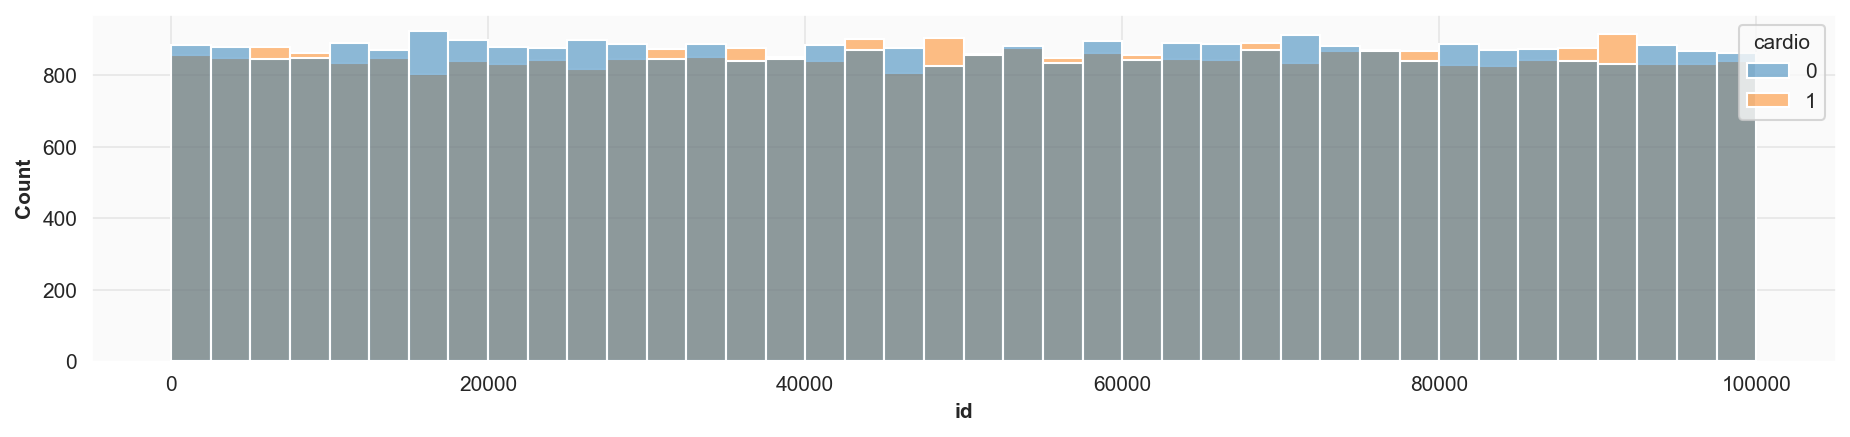

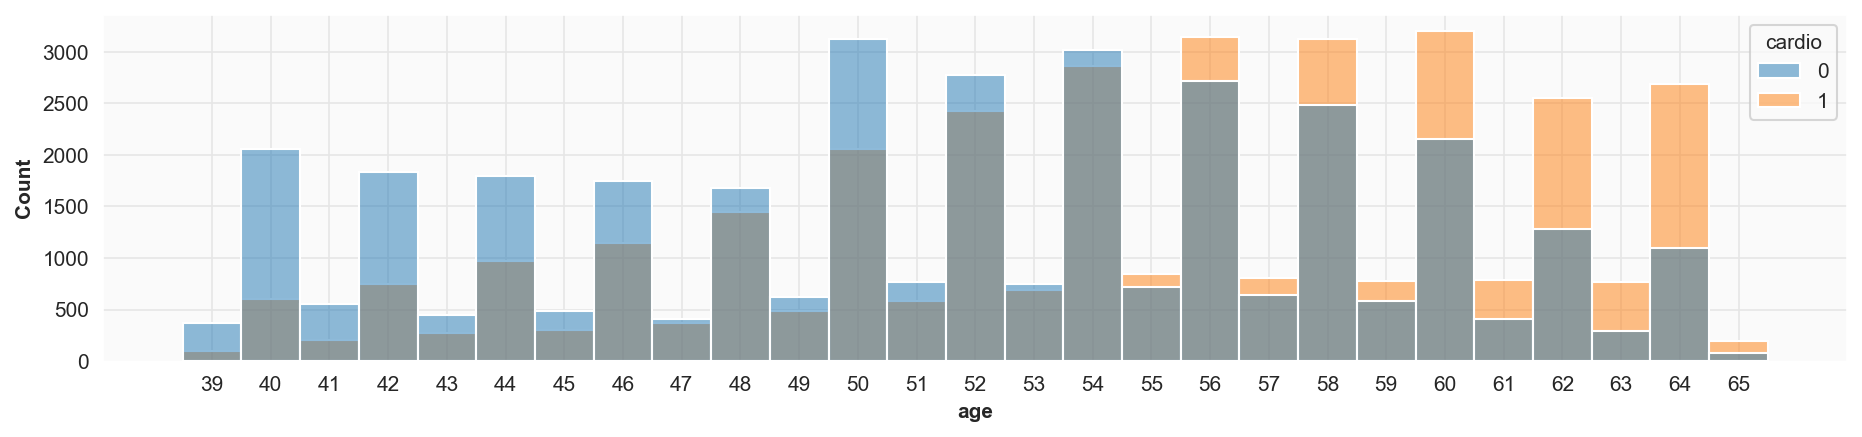

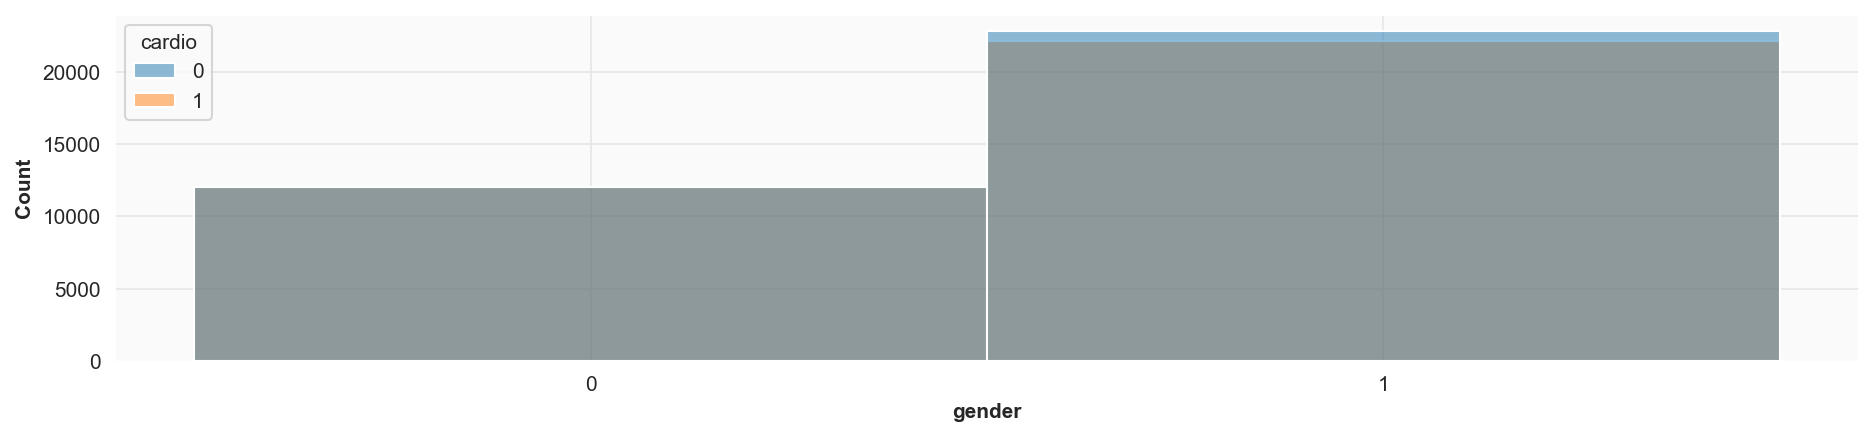

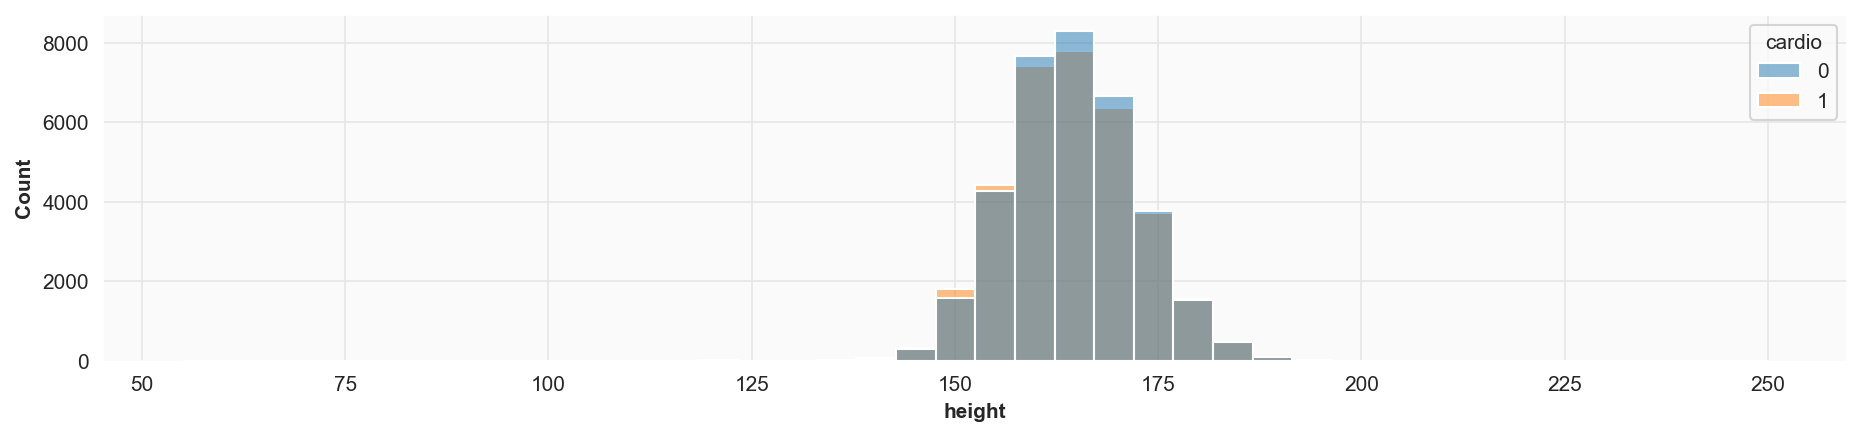

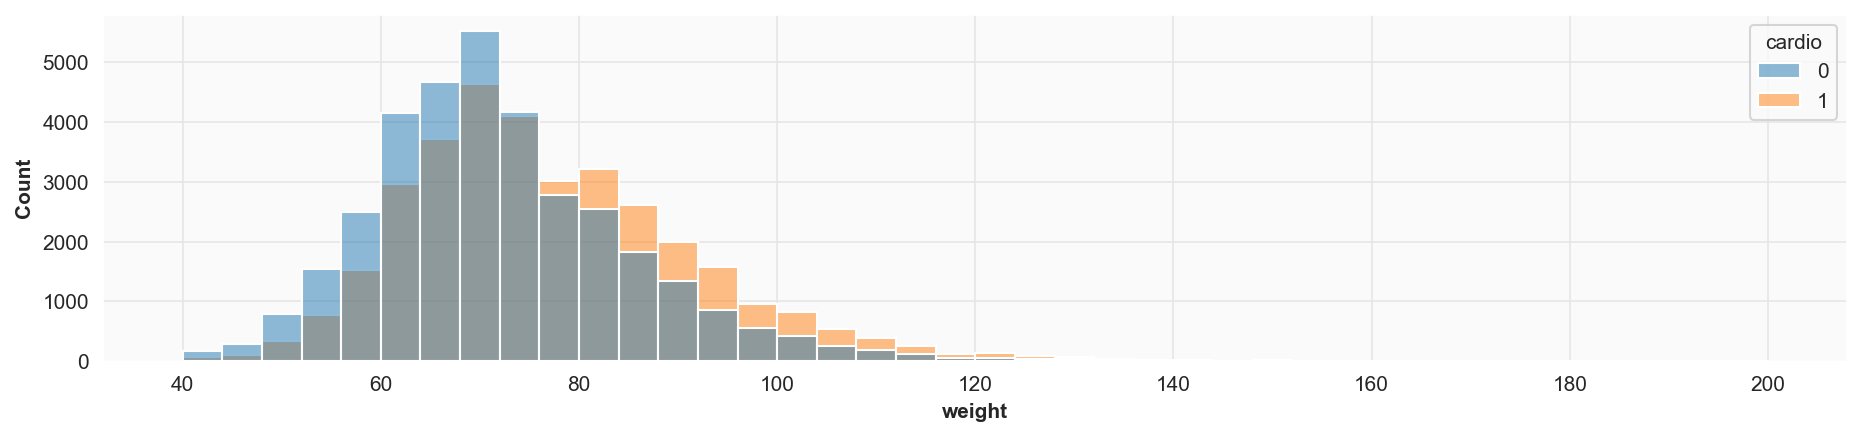

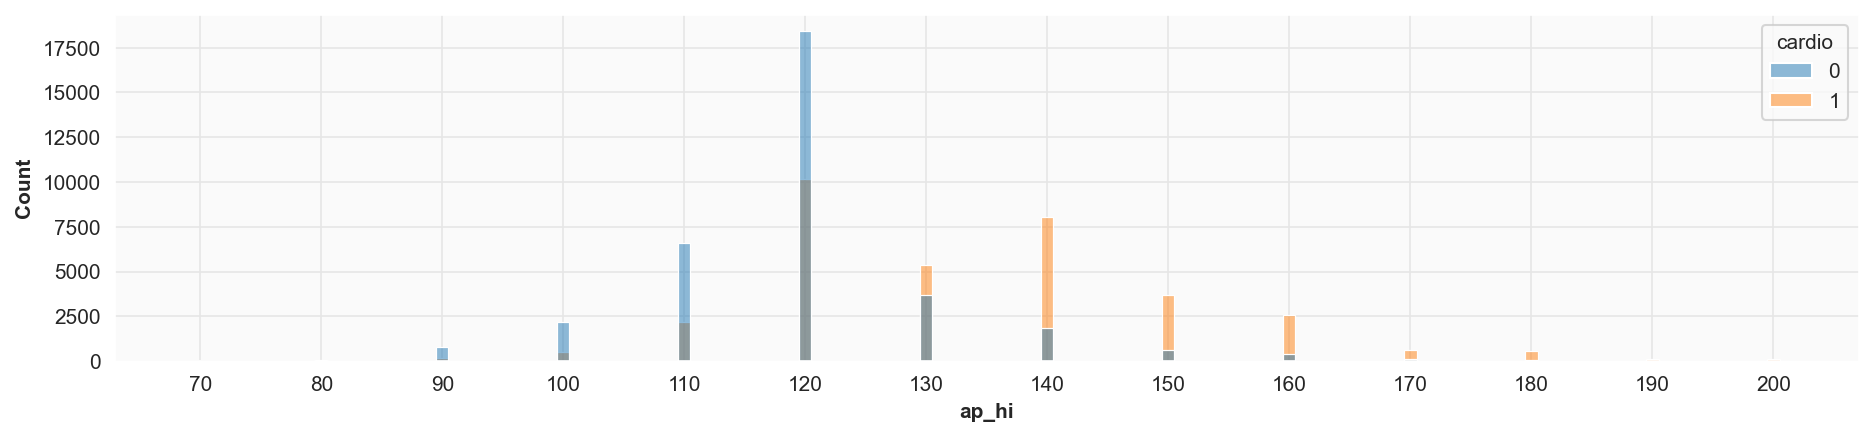

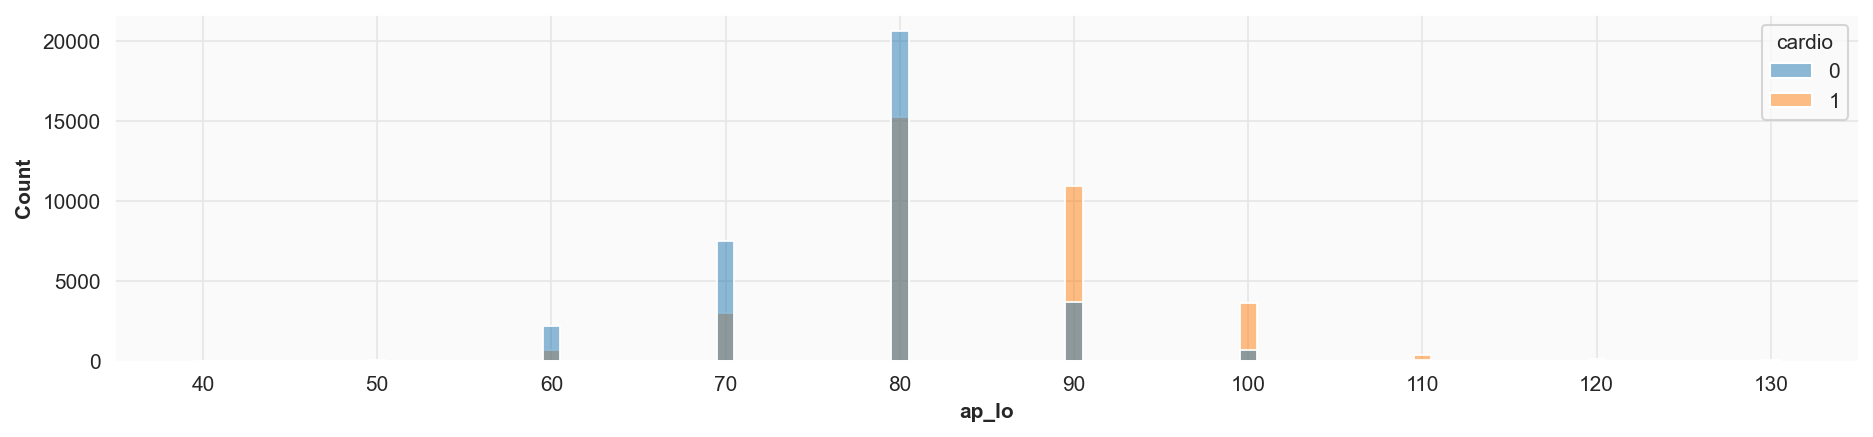

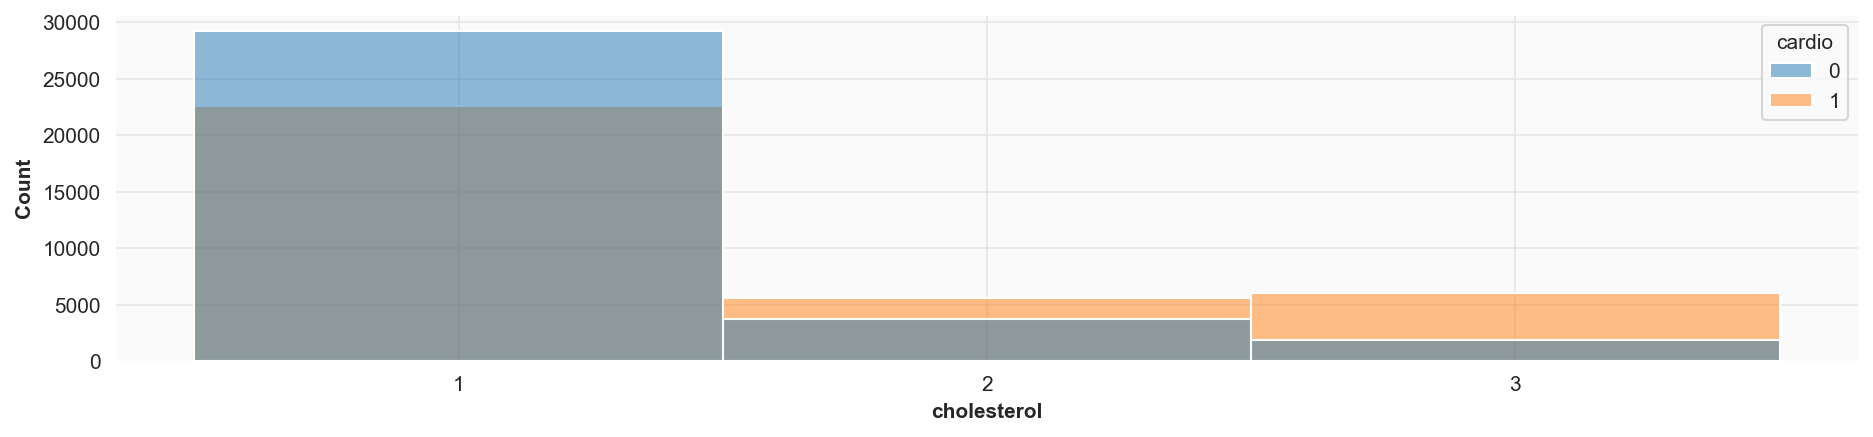

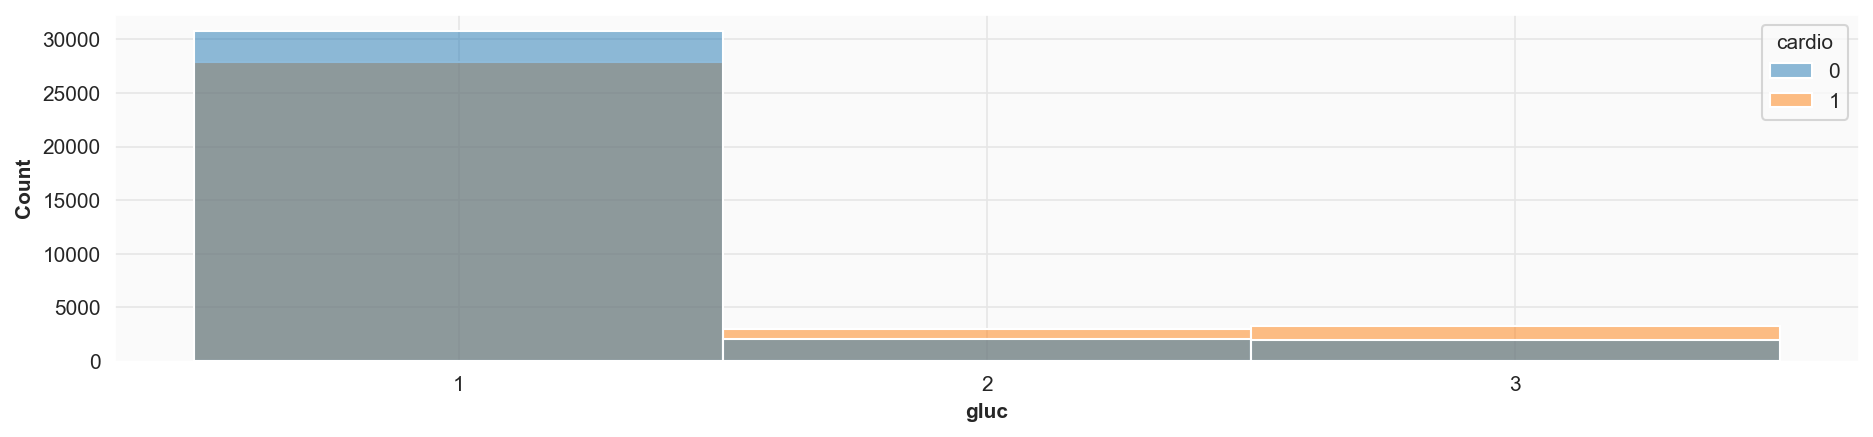

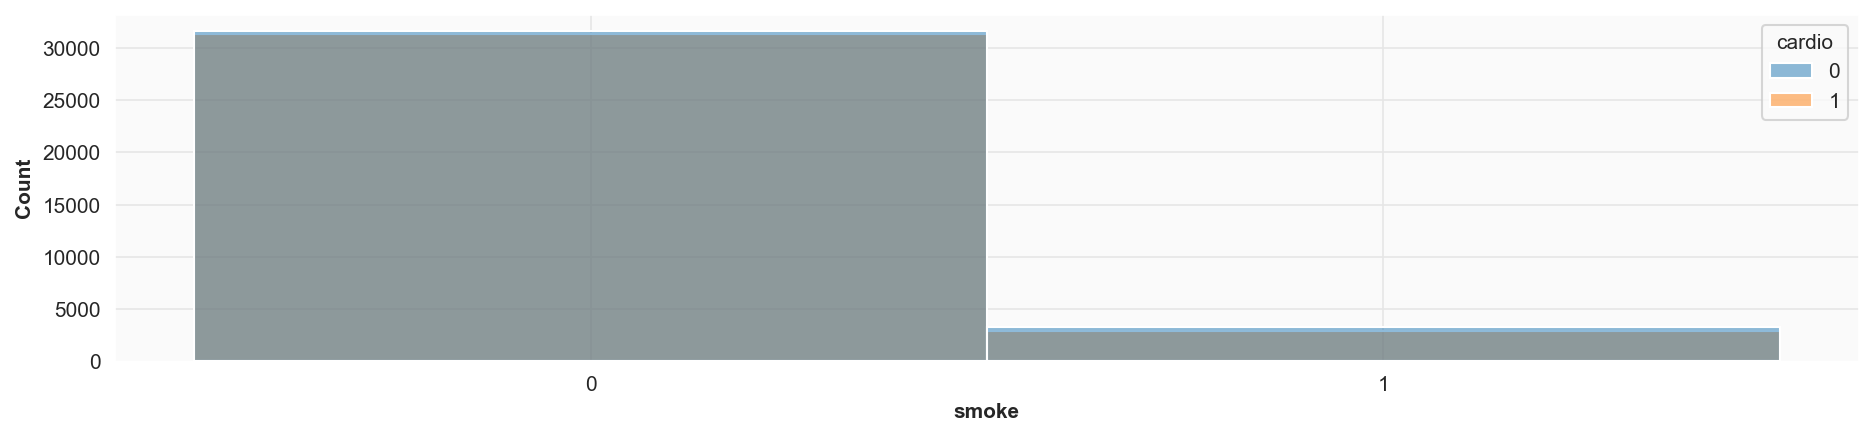

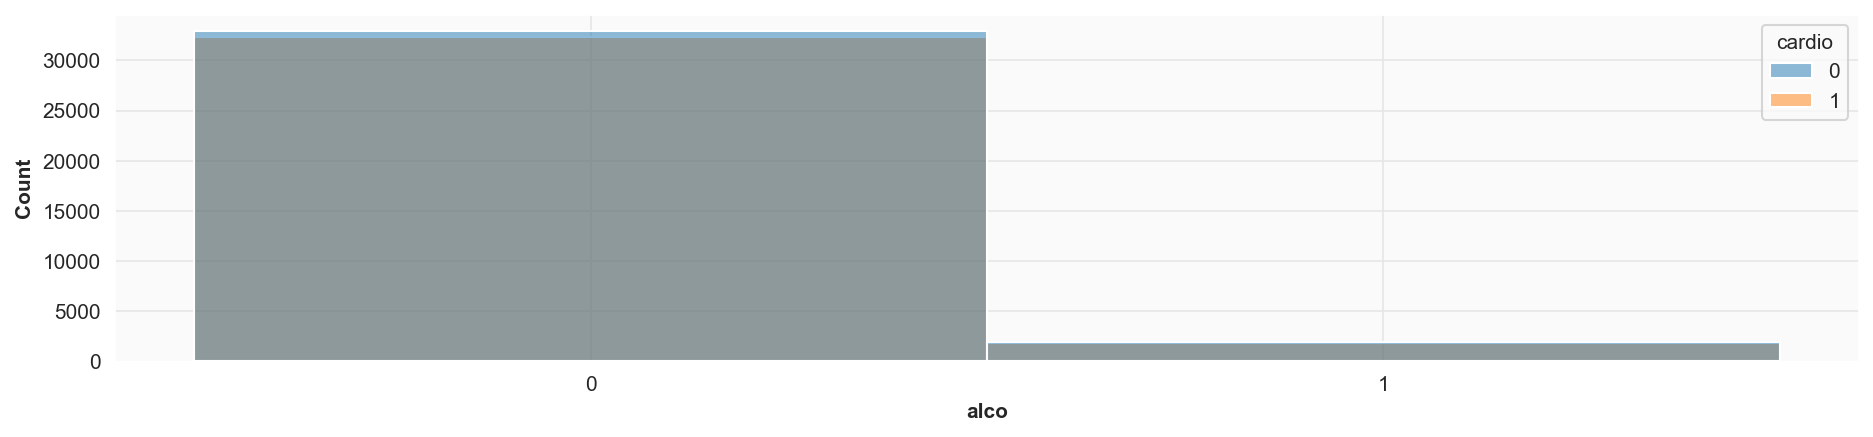

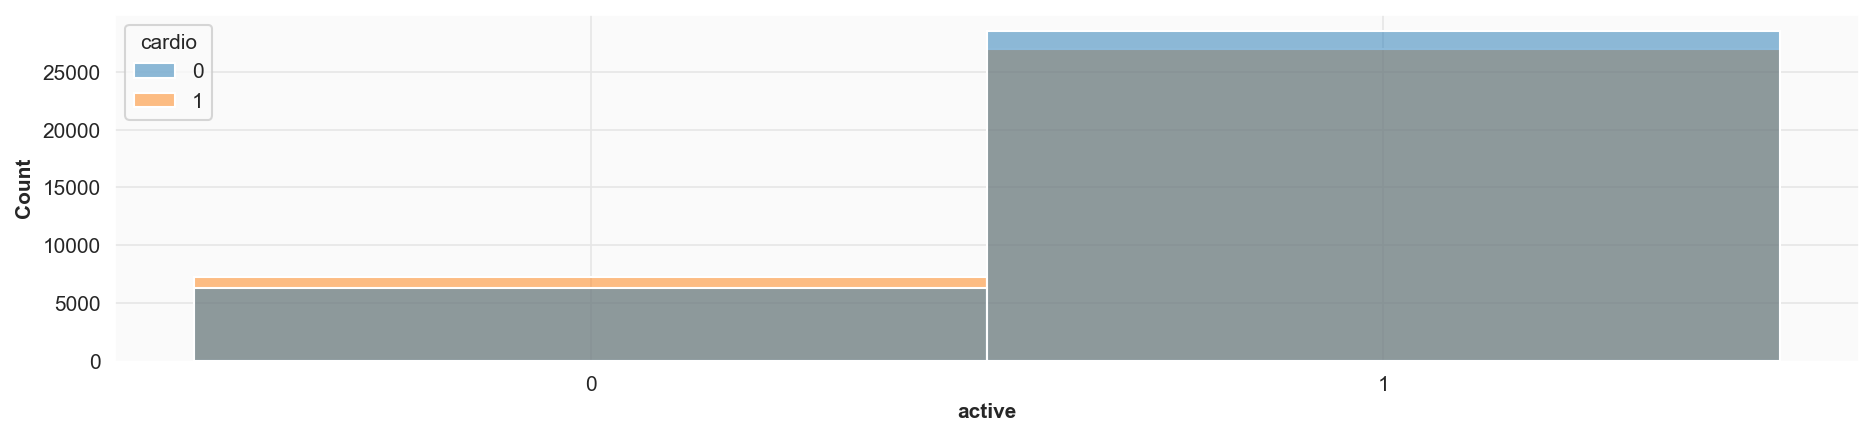

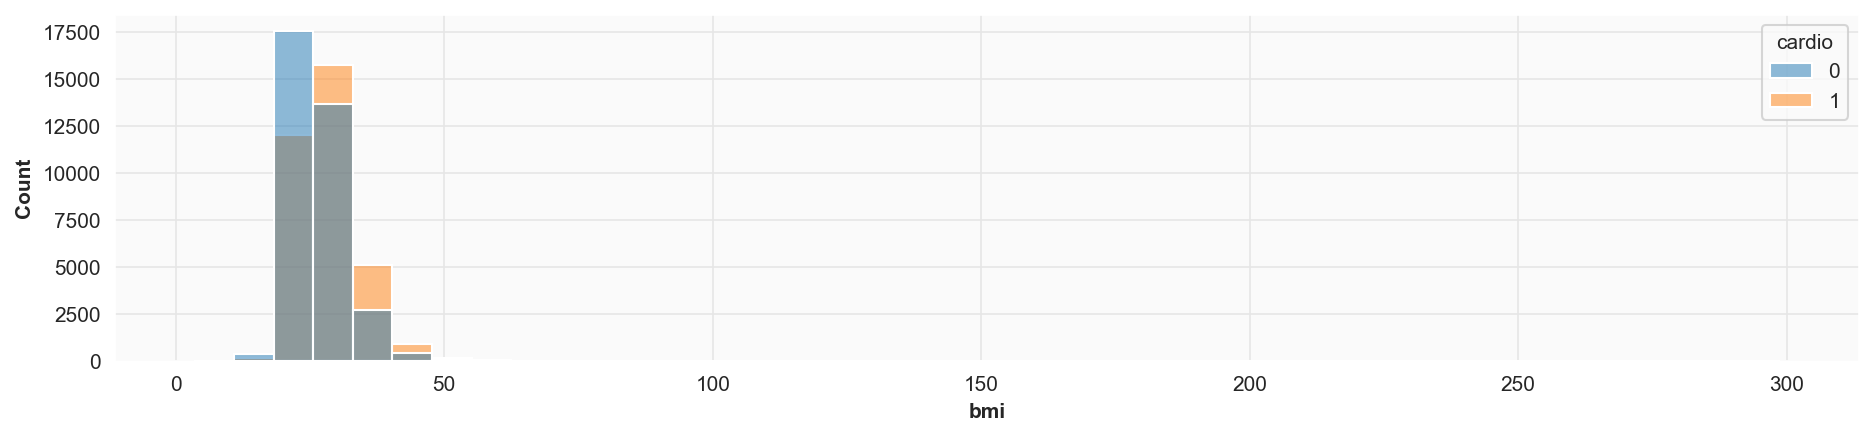

In [69]:
for column in df.drop('cardio', axis=1).columns:
    
    # подбор количества корзин для лучшего восприятия
    bins_treshold = 30
    is_discrete = True if df[column].nunique() < bins_treshold else False
    
    fig, ax = plt.subplots(figsize=(15,3), dpi=PLOT_DPI)
    sns.histplot(x=df[column], hue=df.cardio, bins=40, discrete=is_discrete)
    
    if df[column].nunique() < bins_treshold:
        ax.set_xticks(df[column].unique());

### Повторные pair charts

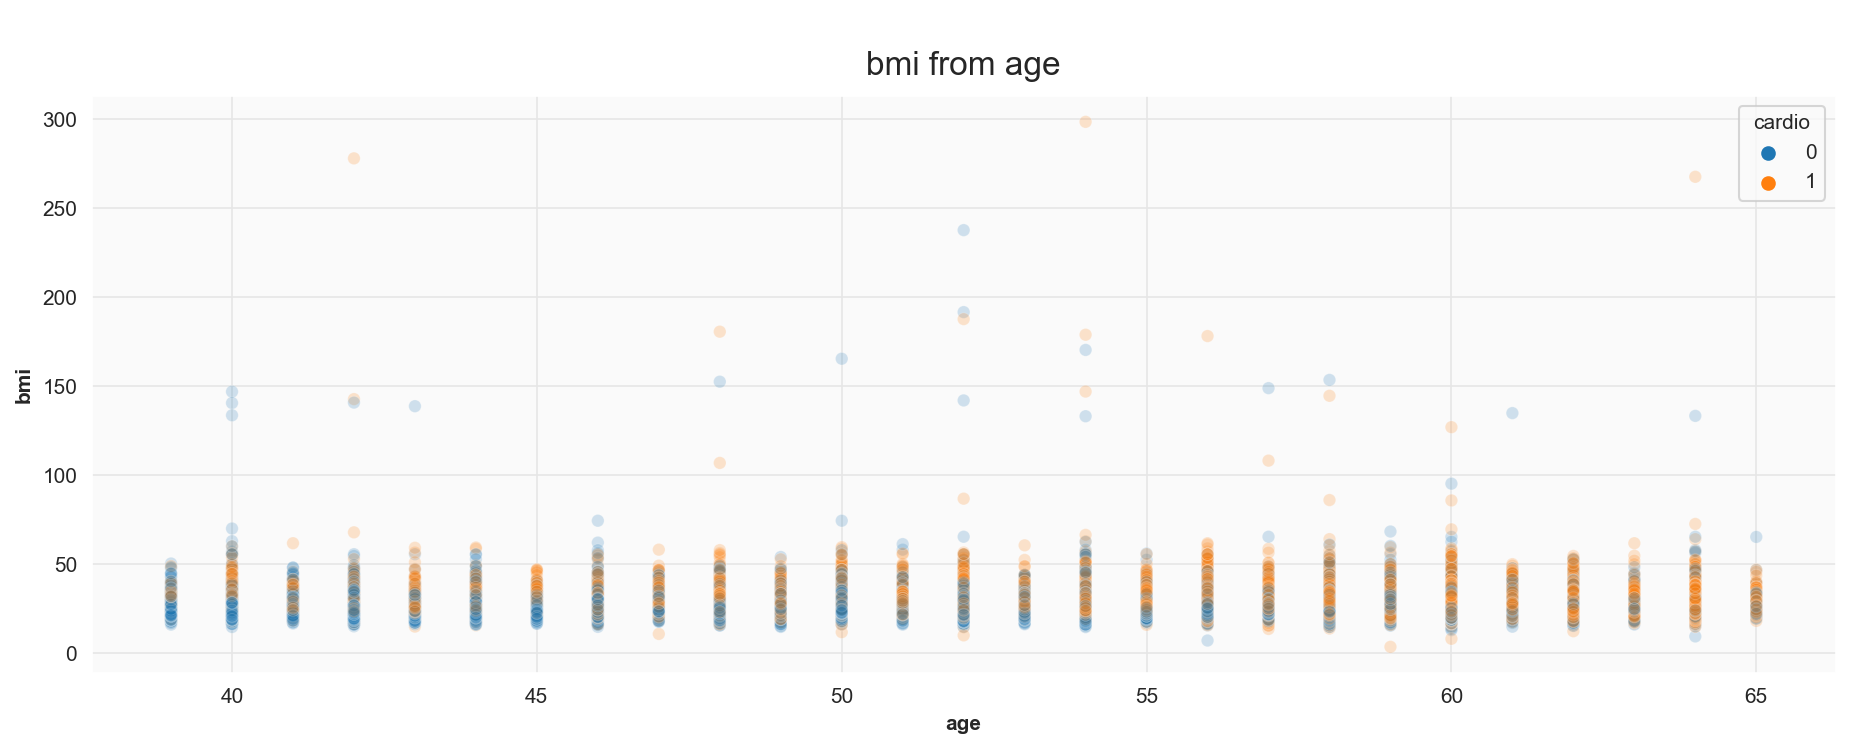

In [70]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='age', y='bmi', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}bmi from age')

plt.show()

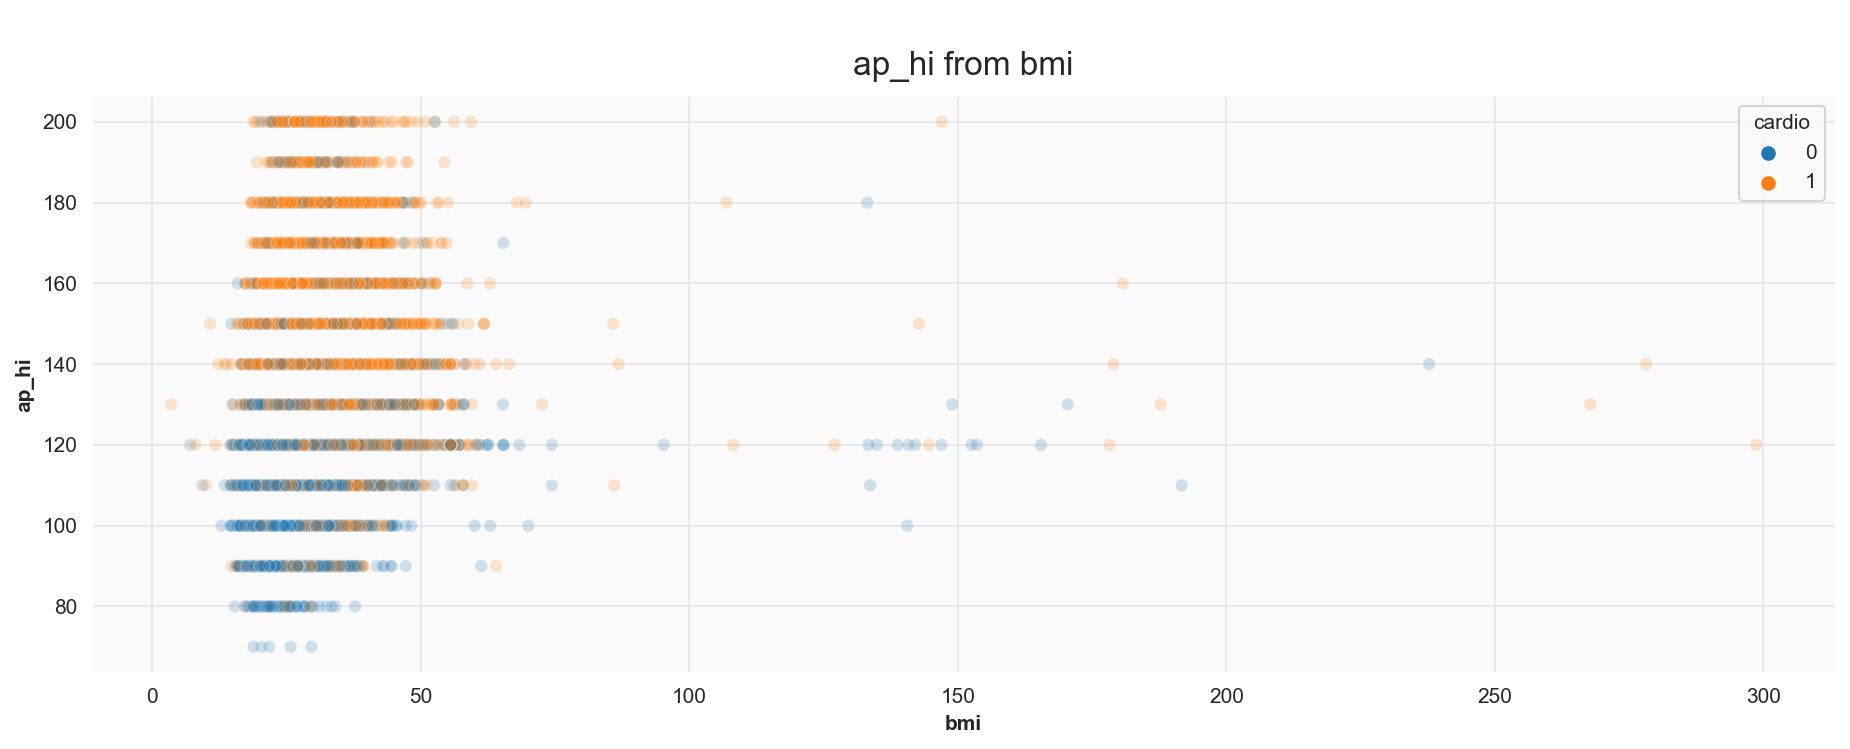

In [71]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='bmi', y='ap_hi', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}ap_hi from bmi')

plt.show()

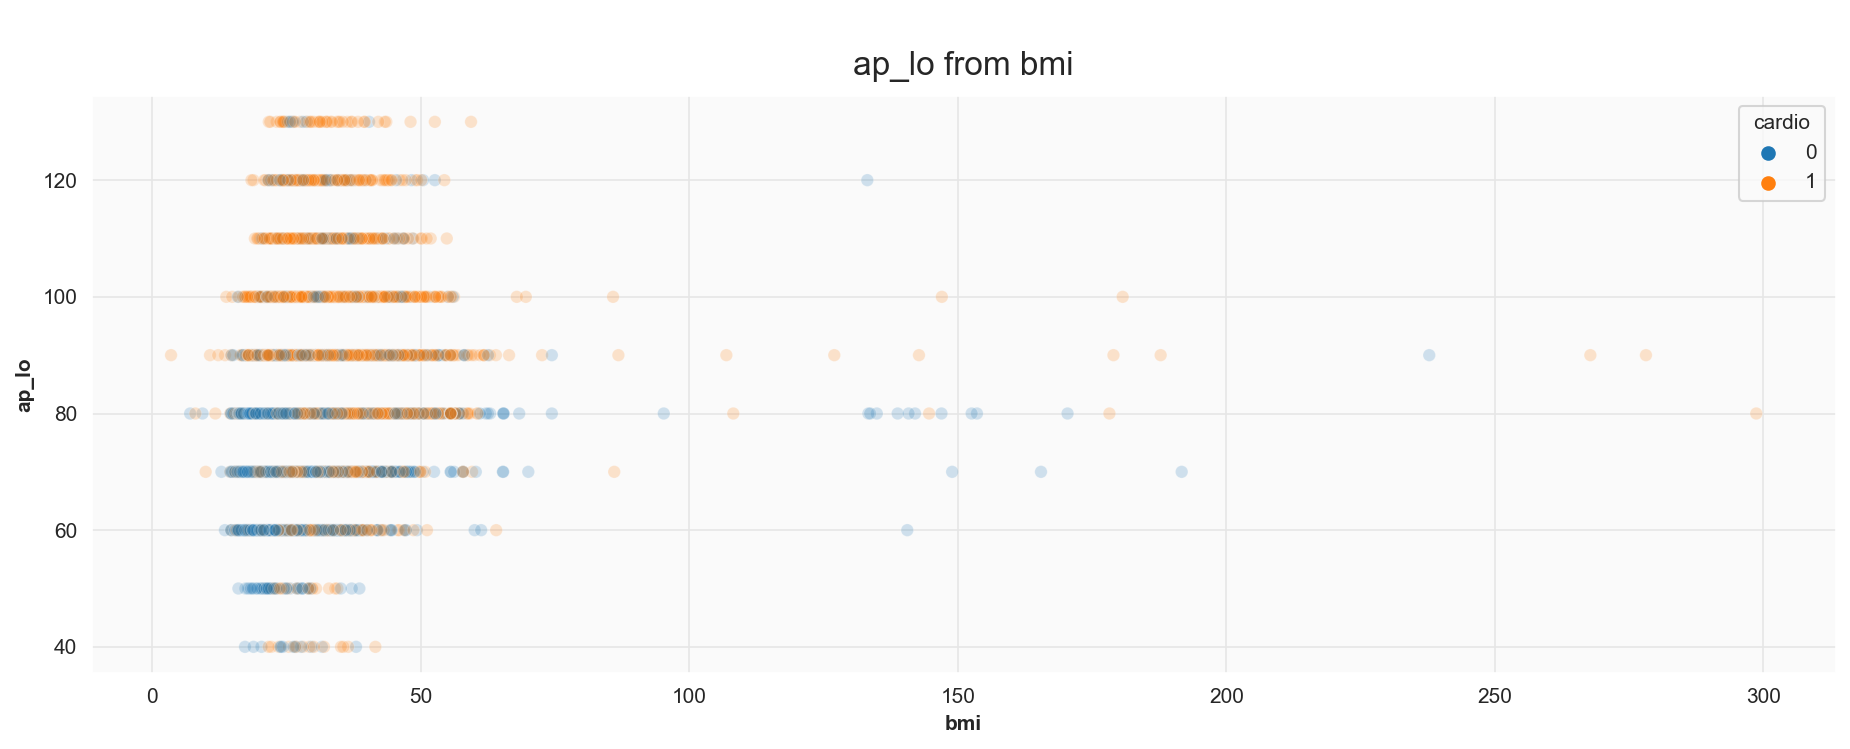

In [72]:
fig, ax = plt.subplots(figsize=(15,5), dpi=PLOT_DPI)
sns.scatterplot(data=data_train, x='bmi', y='ap_lo', hue='cardio', alpha=0.2)
ax.set_title(f'{CR}ap_lo from bmi')

plt.show()

## Save data

Сохранение обработанных данных для следующего этапа.

In [73]:
data_train.to_csv('C:\\Users\\Admin\\Desktop\\DS studies\\Data\\Heart diseases\\PROJECT\\FINAL\\EDA_train.csv', index=False)
data_test.to_csv('C:\\Users\\Admin\\Desktop\\DS studies\\Data\\Heart diseases\\PROJECT\\FINAL\\EDA_test.csv', index=False)

In [82]:
#joblib.dump(data_train, 'model_dump', compress=0, protocol=None, cache_size=None)